In [1]:
# Imports
# !pip install torchinfo
import torch
import torch.nn.functional as F
import torch.utils.data as Data
from torchvision import datasets, transforms
from torchinfo import summary
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import random
import cv2
import Comparison_v4 as CM
import os
import DataSetting_v2 as DS

### Loading

In [2]:
most_datadir = f'../dataset/0509/make20_30-split/'
most_data = DS.ModalityLoader(data_dir=most_datadir, mmap_mode='r', modalities={'rimg', 'tag'})
most_gt = most_data.test_data 

least_datadir = f'../dataset/0509/make20_300-split/'
least_data = DS.ModalityLoader(data_dir=least_datadir, mmap_mode='r', modalities={'rimg', 'tag'})
least_gt = least_data.test_data

Loading from ../dataset/0509/make20_30-split/


  0%|          | 0/20 [00:00<?, ?it/s]

Loading from ../dataset/0509/make20_300-split/


  0%|          | 0/20 [00:00<?, ?it/s]

In [3]:
print(len(most_gt['tag']), len(least_gt['tag']))

5701 5299


prop loaded TR_PRED of (5299, 128, 128) as float32
prop loaded SR_PRED of (5299, 128, 128) as float32
prop loaded TC_PRED of (5299, 128, 128) as float32
prop loaded SC_PRED of (5299, 128, 128) as float32
prop loaded S_CTR of (5299, 2) as float32
prop loaded S_DPT of (5299,) as float32
prop loaded TAG of (5299, 4) as float32


<Figure size 1584x720 with 0 Axes>

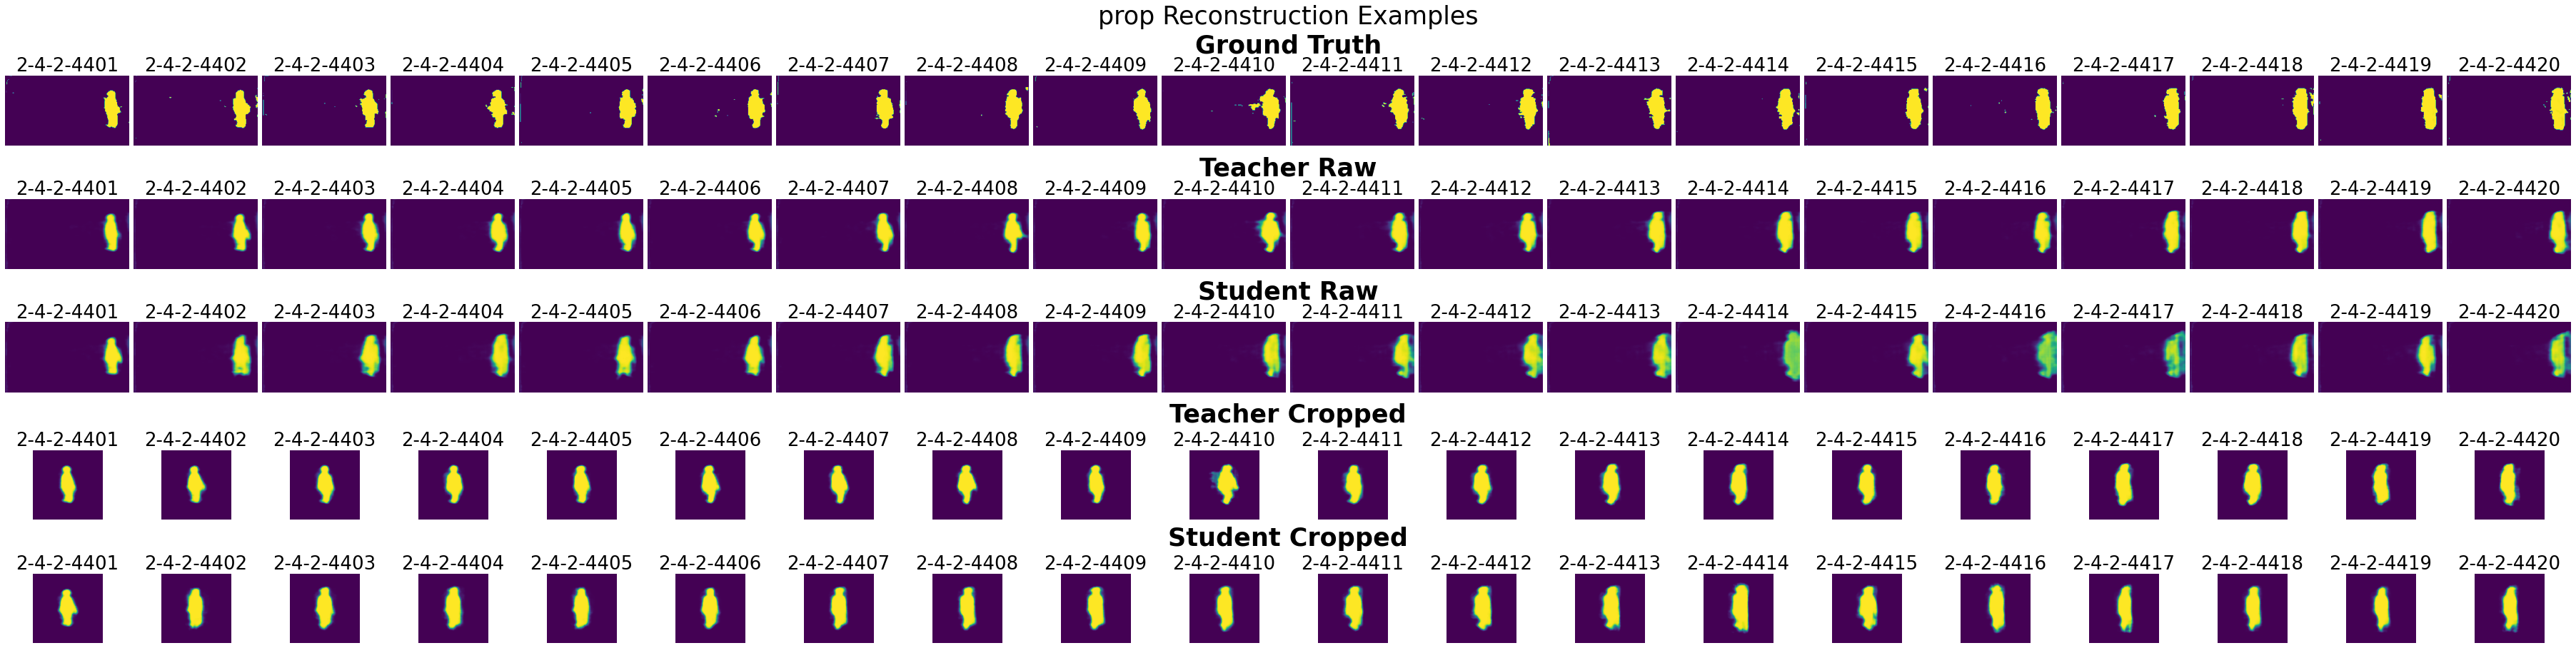

{'prop_Reconstruct.jpg': <Figure size 3600x900 with 100 Axes>}

In [8]:
prop = CM.ProposedResults(name='prop', path='../saved/240811_300_V08F6_depthLoss/',
                                                     gt=least_gt,
                                                     gt_tag=CM.Estimates.structurize_tags(least_gt['tag']))
prop.plot_example()

In [4]:
subjects = {

    'V08F3': '../saved/240717_300_V08F3_3L/',
    'V08F3_merge': '../saved/240717_300_V08F3_3L/',
    
    'V08H1T0.5': '../saved/240906_300_V0812_T0.5',
    'V08H1T1': '../saved/240906_300_V0812_T1',
    'V08H1T2': '../saved/240906_300_V0812_T2',
    
    'V08H2T0.5': '../saved/240906_300_V08H2_1_T0.5',
    'V08H2T1': '../saved/240906_300_V08H2_1_T1',
    'V08H2T2': '../saved/240906_300_V08H2_1_T2',
    
    'V08H3T0.5': '../saved/240908_300_V08H3_1_T0.5',
    'V08H3T1': '../saved/240908_300_V08H3_1_T1',
    'V08H3T2': '../saved/240908_300_V08H3_1_T2',
    
    #'300BBX_FP': '../saved/240607_300_BBX/',
    'AE_comp': '../saved/240608_AE/',
    # 'VAE_comp': '../saved/240608_VAE/',
    # 'TSAE_comp': '../saved/240608_TSAE/',
    # 'TSVAE_comp': '../saved/240608_TSVAE/',
    # 'WI2VI_comp': '../saved/240608_Wi2Vi/',
    
}

In [5]:
RP = CM.ResultProcess(subjects=subjects, most_gt=most_gt, least_gt=least_gt)
RP.load_preds()

Loading V08F3...
V08F3 loaded TR_PRED of (5299, 128, 128) as float32
V08F3 loaded SR_PRED of (5299, 128, 128) as float32
V08F3 loaded TC_PRED of (5299, 128, 128) as float32
V08F3 loaded SC_PRED of (5299, 128, 128) as float32
V08F3 loaded GT_CTR of (5299, 2) as float32
V08F3 loaded GT_DPT of (5299,) as float32
V08F3 loaded S_CTR of (5299, 2) as float32
V08F3 loaded S_DPT of (5299,) as float32
V08F3 loaded TAG of (5299, 4) as float32
Loading V08F3_merge...
V08F3_merge loaded TR_PRED of (5299, 128, 128) as float32
V08F3_merge loaded SR_PRED of (5299, 128, 128) as float32
V08F3_merge loaded TC_PRED of (5299, 128, 128) as float32
V08F3_merge loaded SC_PRED of (5299, 128, 128) as float32
V08F3_merge loaded GT_CTR of (5299, 2) as float32
V08F3_merge loaded GT_DPT of (5299,) as float32
V08F3_merge loaded S_CTR of (5299, 2) as float32
V08F3_merge loaded S_DPT of (5299,) as float32
V08F3_merge loaded TAG of (5299, 4) as float32
Loading V08H1T0.5...
V08H1T0.5 loaded TR_PRED of (5299, 128, 128) as

V08F3 resizing & calculating loss...


  0%|          | 0/5299 [00:00<?, ?it/s]

/home/bob/datastore/Models/Comparison_v4.py:200: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at ../torch/csrc/utils/tensor_numpy.cpp:199.)
  torch.from_numpy(self.gt[gt_ind])).numpy()
/home/bob/datastore/Models/Comparison_v4.py:200: UserWarning: Using a target size (torch.Size([1, 128, 226])) that is different to the input size (torch.Size([128, 226])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  torch.from_numpy(self.gt[gt_ind])).numpy()


Done!
V08F3_merge reconstructing...


  0%|          | 0/5299 [00:00<?, ?it/s]

/home/bob/datastore/Models/Comparison_v4.py:421: UserWarning: Using a target size (torch.Size([1, 128, 226])) that is different to the input size (torch.Size([128, 226])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  torch.from_numpy(self.gt[gt_ind])).numpy()


Done
 Reconstruction finished. Failure count = 0
V08H1T0.5 resizing & calculating loss...


  0%|          | 0/5299 [00:00<?, ?it/s]

Done!
V08H1T1 resizing & calculating loss...


  0%|          | 0/5299 [00:00<?, ?it/s]

Done!
V08H1T2 resizing & calculating loss...


  0%|          | 0/5299 [00:00<?, ?it/s]

Done!
V08H2T0.5 resizing & calculating loss...


  0%|          | 0/5299 [00:00<?, ?it/s]

Done!
V08H2T1 resizing & calculating loss...


  0%|          | 0/5299 [00:00<?, ?it/s]

Done!
V08H2T2 resizing & calculating loss...


  0%|          | 0/5299 [00:00<?, ?it/s]

Done!
V08H3T0.5 resizing & calculating loss...


  0%|          | 0/5299 [00:00<?, ?it/s]

Done!
V08H3T1 resizing & calculating loss...


  0%|          | 0/5299 [00:00<?, ?it/s]

Done!
V08H3T2 resizing & calculating loss...


  0%|          | 0/5299 [00:00<?, ?it/s]

Done!
AE_comp resizing & calculating loss...


  0%|          | 0/5701 [00:00<?, ?it/s]

Done!
V08F3 calculating 2D correlation...

  0%|          | 0/5299 [00:00<?, ?it/s]

Done!
V08F3_merge calculating 2D correlation...

  0%|          | 0/5299 [00:00<?, ?it/s]

Done!
V08H1T0.5 calculating 2D correlation...

  0%|          | 0/5299 [00:00<?, ?it/s]

Done!
V08H1T1 calculating 2D correlation...

  0%|          | 0/5299 [00:00<?, ?it/s]

Done!
V08H1T2 calculating 2D correlation...

  0%|          | 0/5299 [00:00<?, ?it/s]

Done!
V08H2T0.5 calculating 2D correlation...

  0%|          | 0/5299 [00:00<?, ?it/s]

Done!
V08H2T1 calculating 2D correlation...

  0%|          | 0/5299 [00:00<?, ?it/s]

Done!
V08H2T2 calculating 2D correlation...

  0%|          | 0/5299 [00:00<?, ?it/s]

Done!
V08H3T0.5 calculating 2D correlation...

  0%|          | 0/5299 [00:00<?, ?it/s]

Done!
V08H3T1 calculating 2D correlation...

  0%|          | 0/5299 [00:00<?, ?it/s]

Done!
V08H3T2 calculating 2D correlation...

  0%|          | 0/5299 [00:00<?, ?it/s]

Done!
AE_comp calculating 2D correlation...

  0%|          | 0/5701 [00:10<?, ?it/s]

Done!
V08F3 calculating segment mean...Done
V08F3_merge calculating segment mean...Done
V08H1T0.5 calculating segment mean...Done
V08H1T1 calculating segment mean...Done
V08H1T2 calculating segment mean...Done
V08H2T0.5 calculating segment mean...Done
V08H2T1 calculating segment mean...Done
V08H2T2 calculating segment mean...Done
V08H3T0.5 calculating segment mean...Done
V08H3T1 calculating segment mean...Done
V08H3T2 calculating segment mean...Done
AE_comp calculating segment mean...Done


<Figure size 432x288 with 0 Axes>

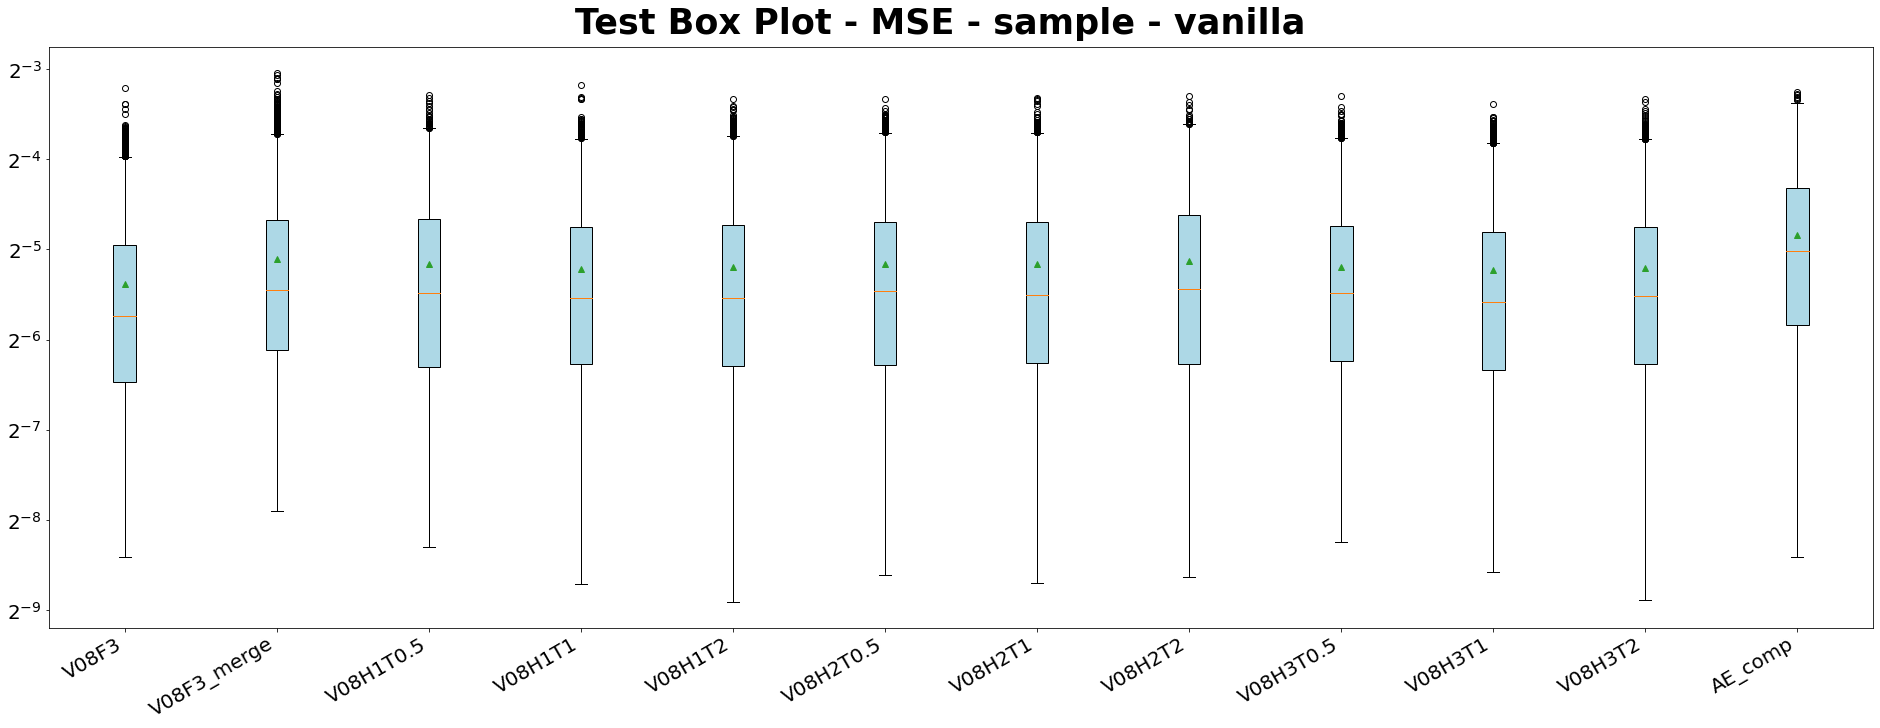

<Figure size 1872x720 with 0 Axes>

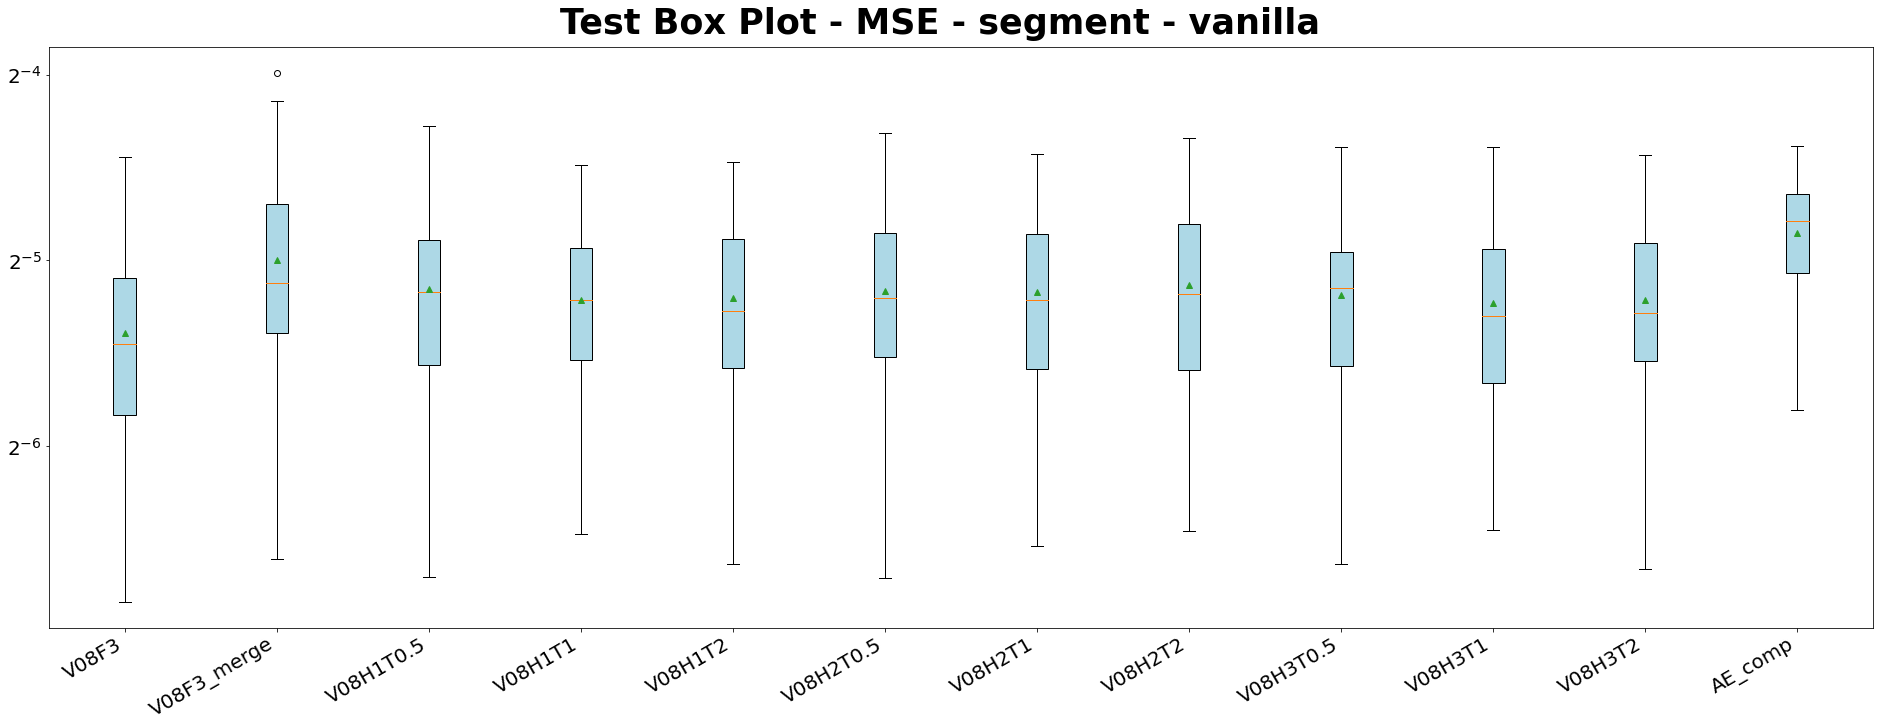

<Figure size 1872x720 with 0 Axes>

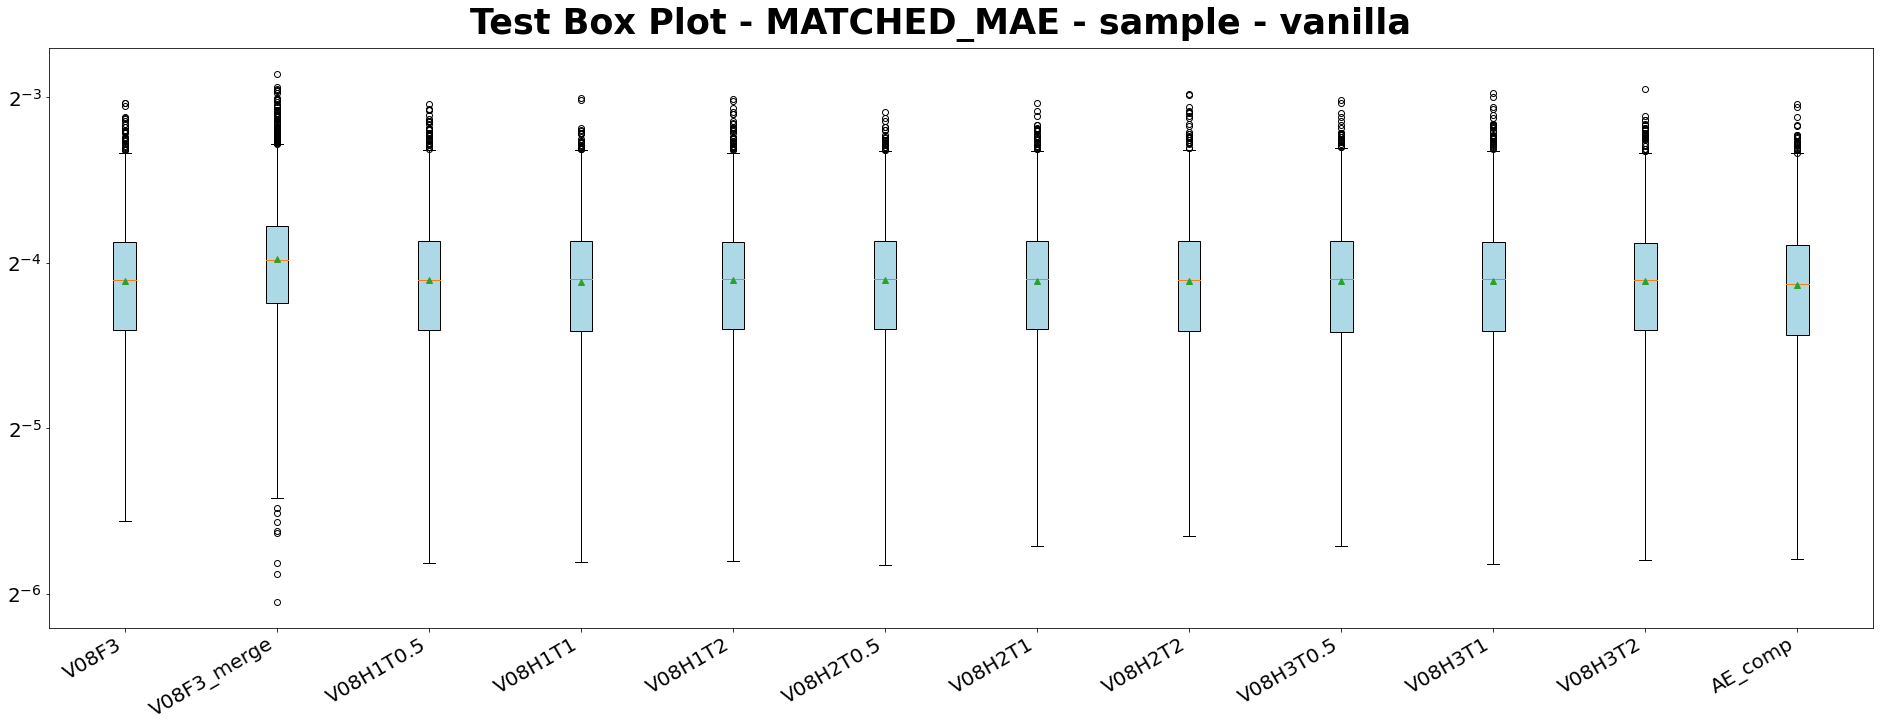

<Figure size 1872x720 with 0 Axes>

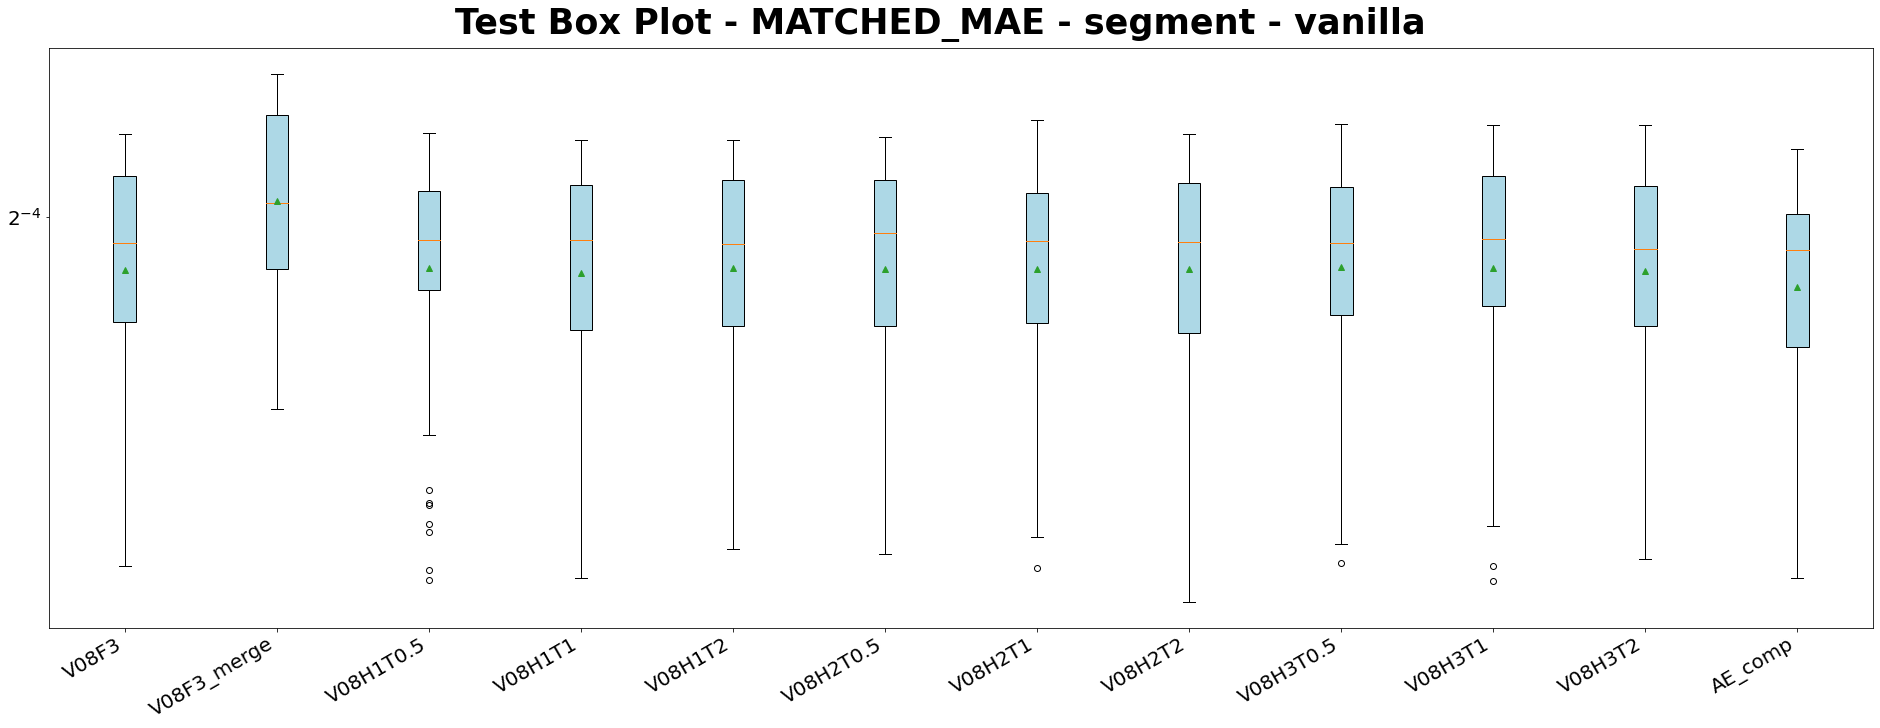

<Figure size 1872x720 with 0 Axes>

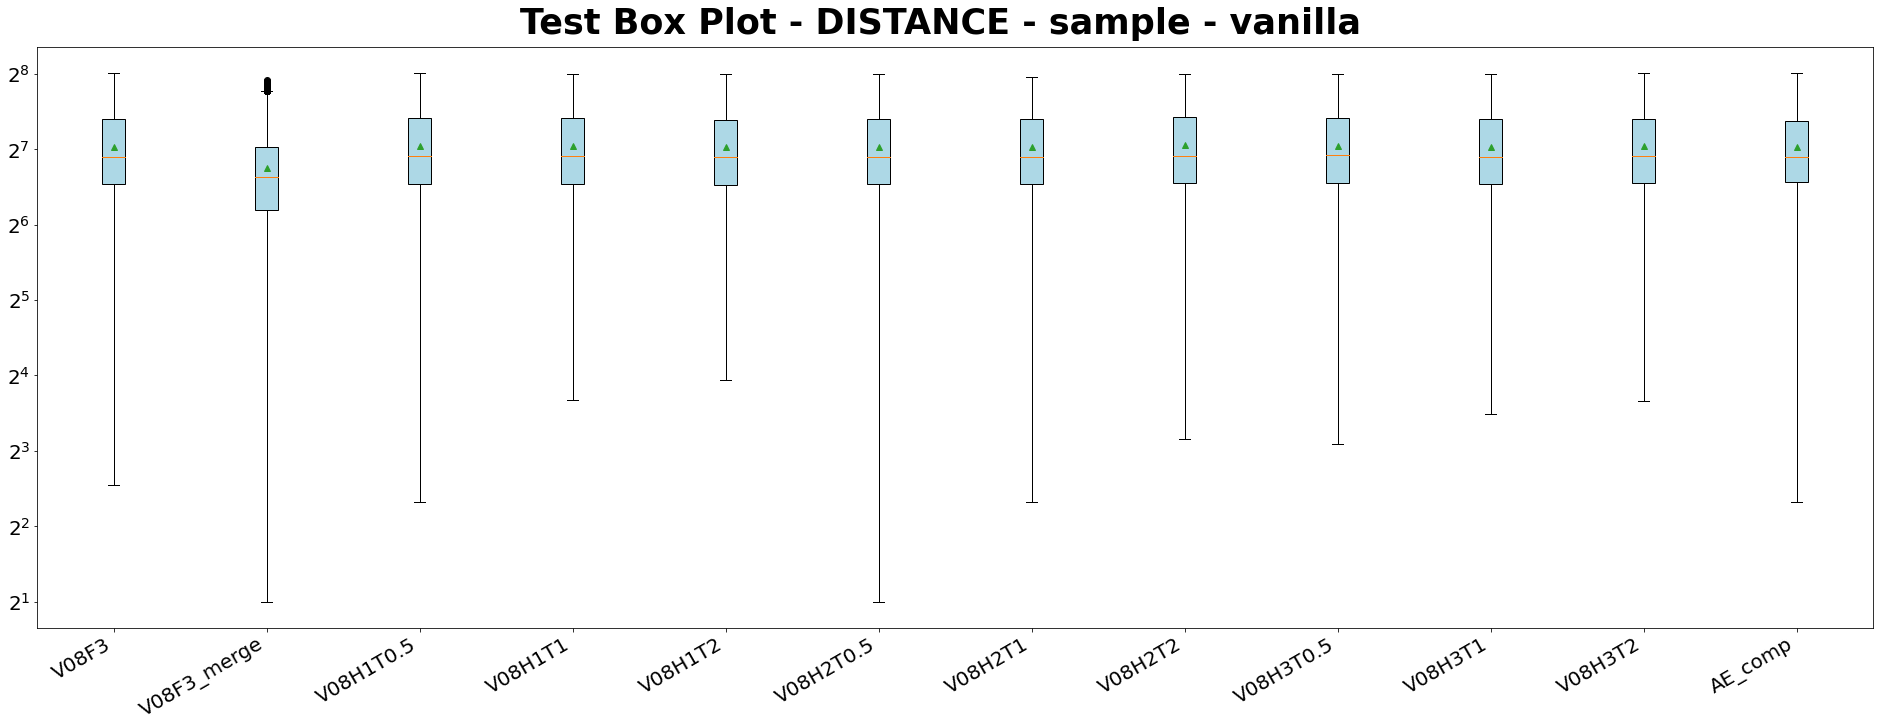

<Figure size 1872x720 with 0 Axes>

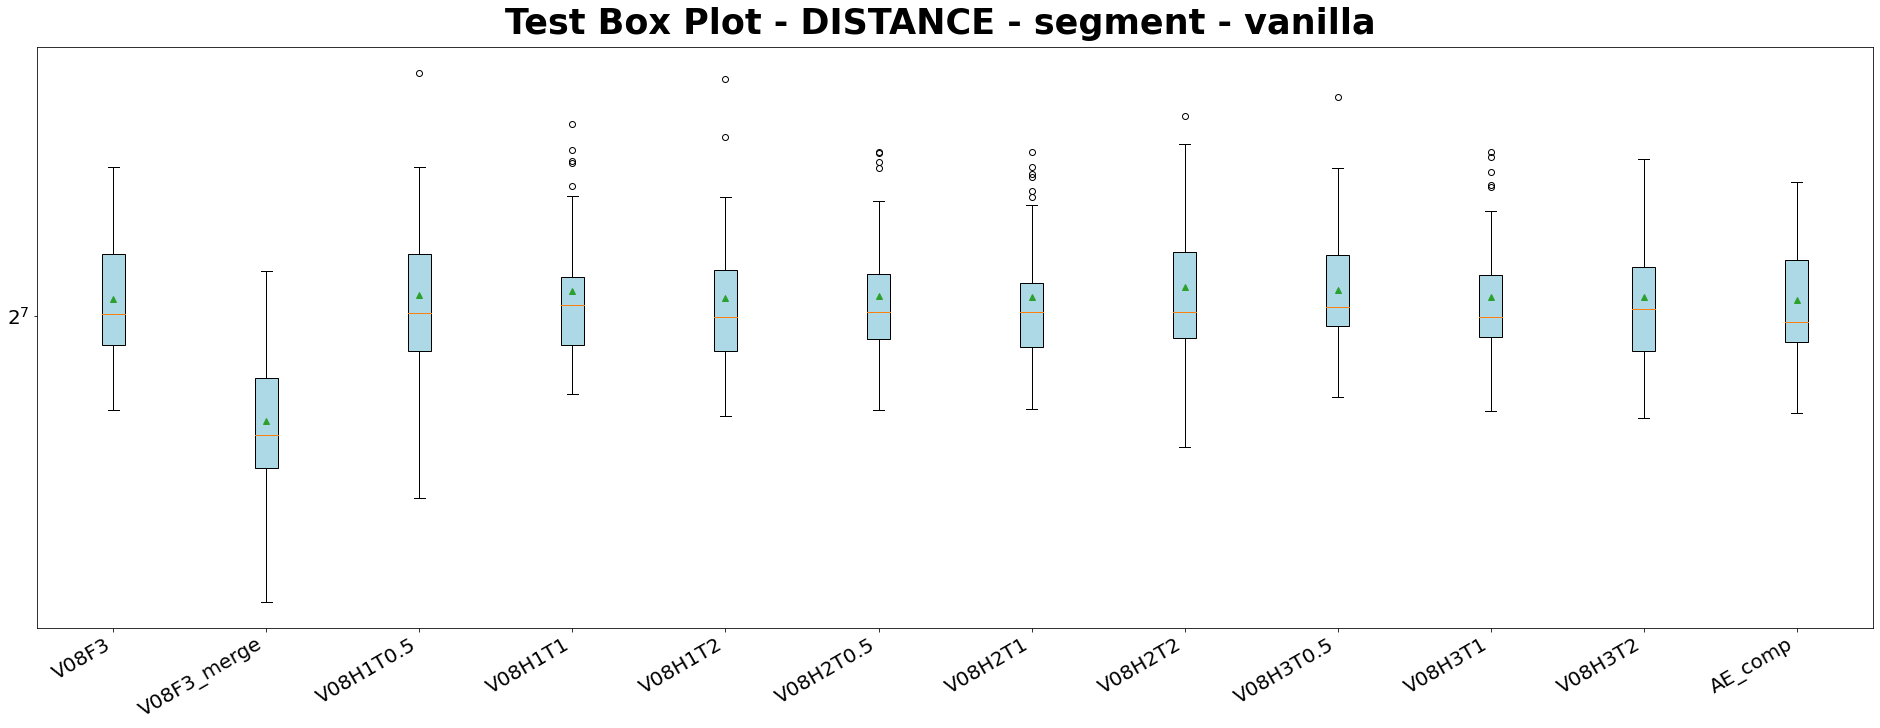

<Figure size 1872x720 with 0 Axes>

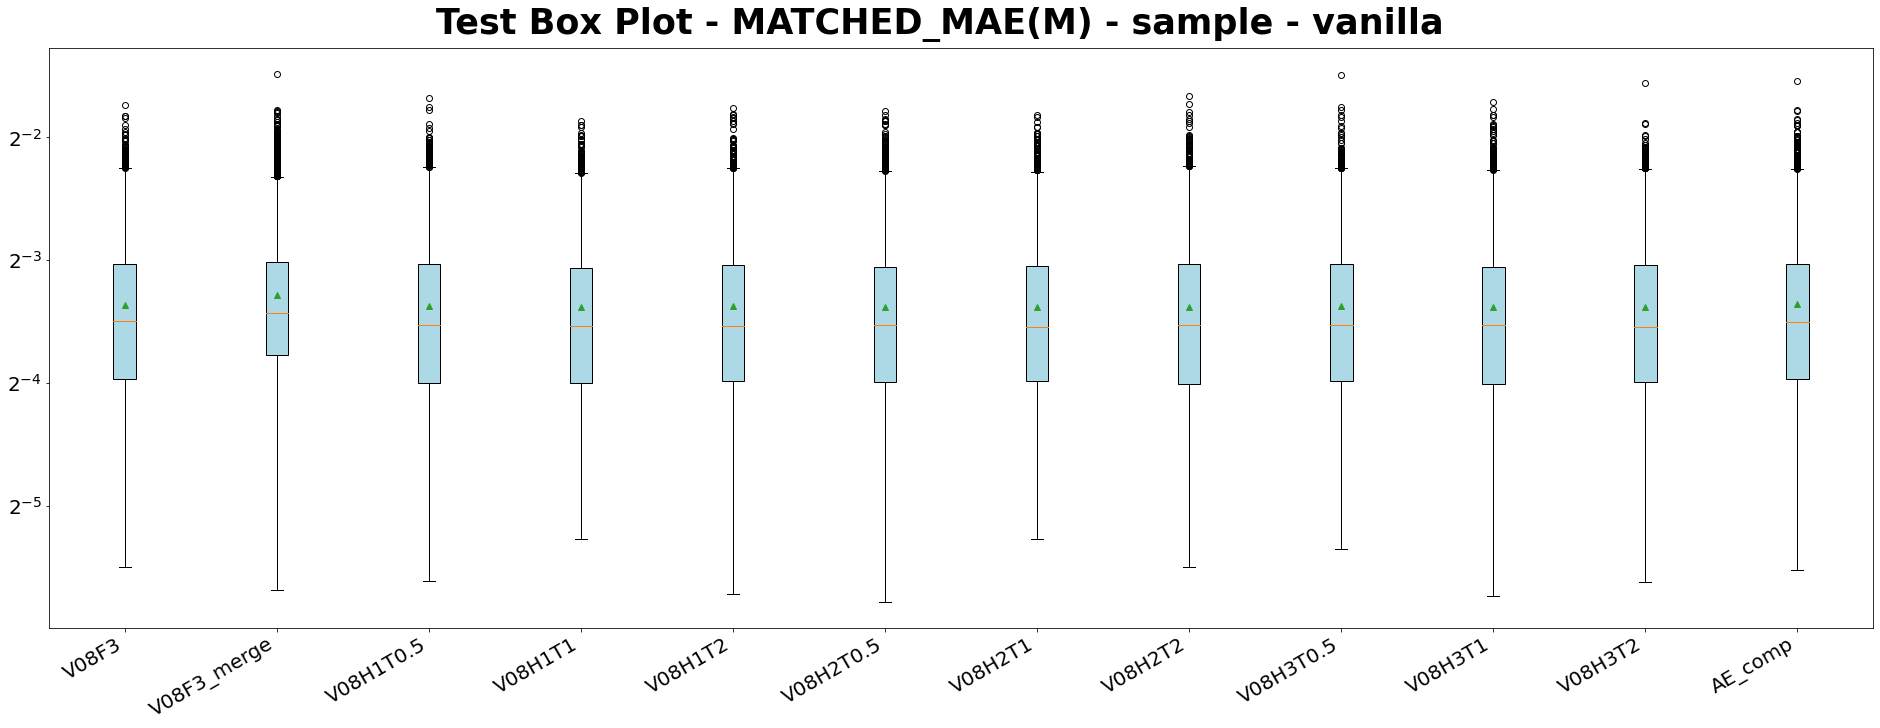

<Figure size 1872x720 with 0 Axes>

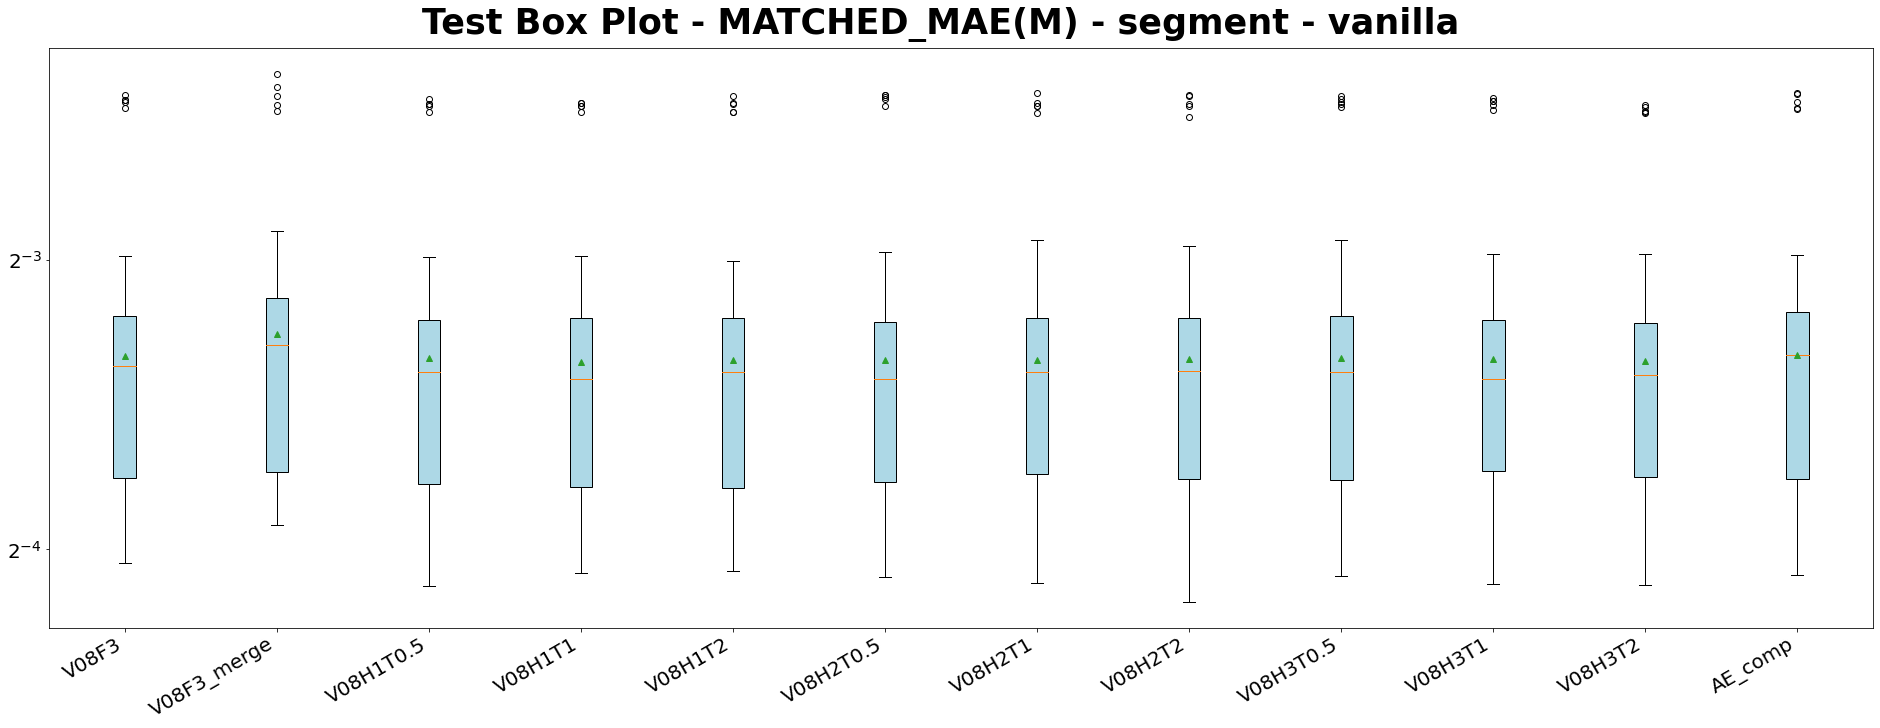

<Figure size 1872x720 with 0 Axes>

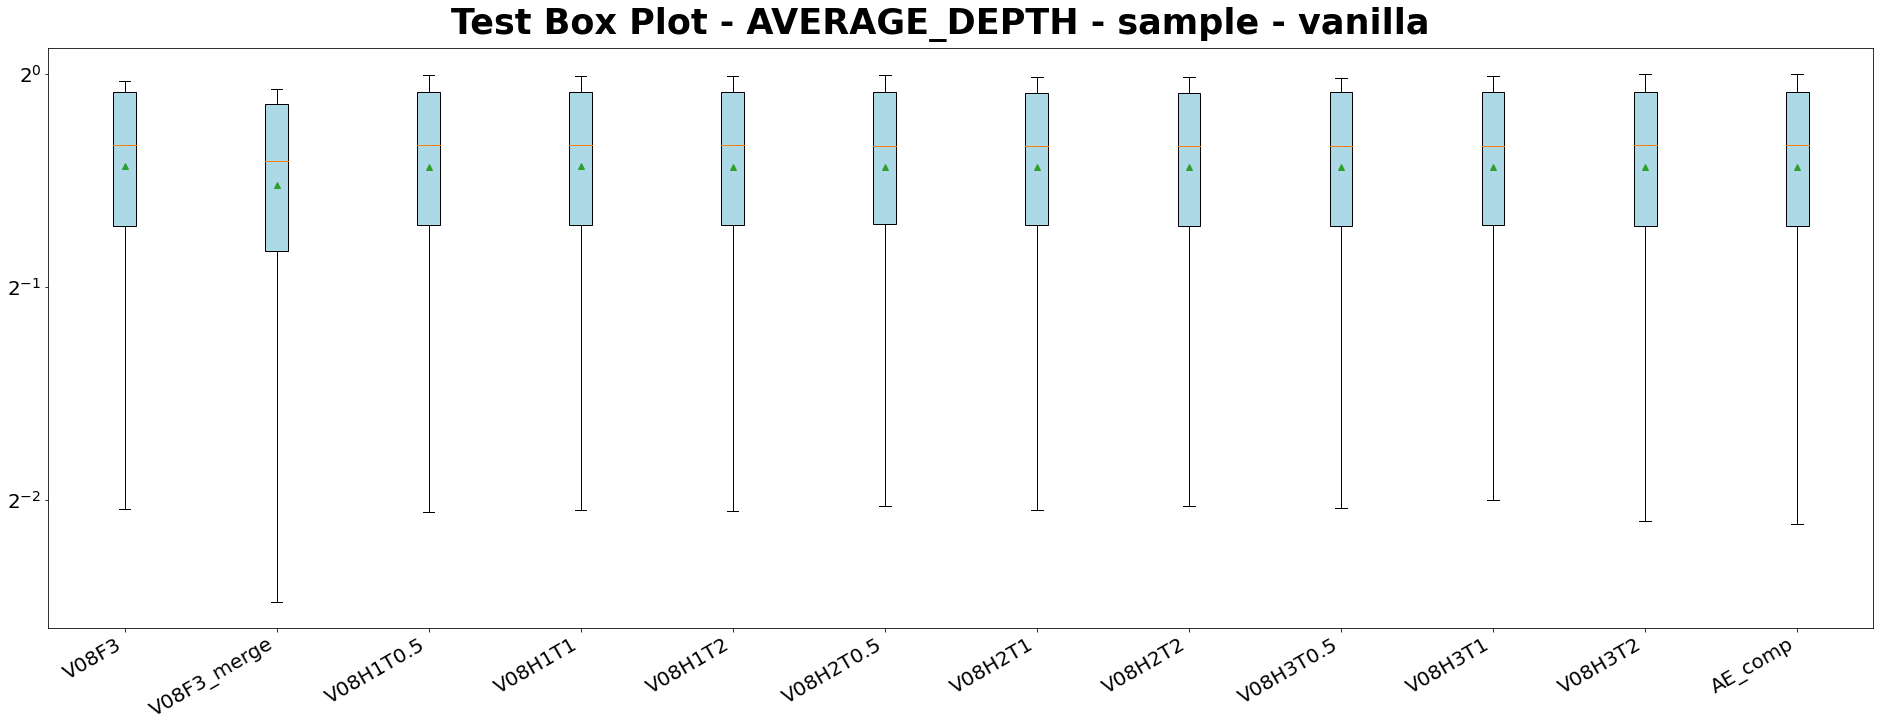

<Figure size 1872x720 with 0 Axes>

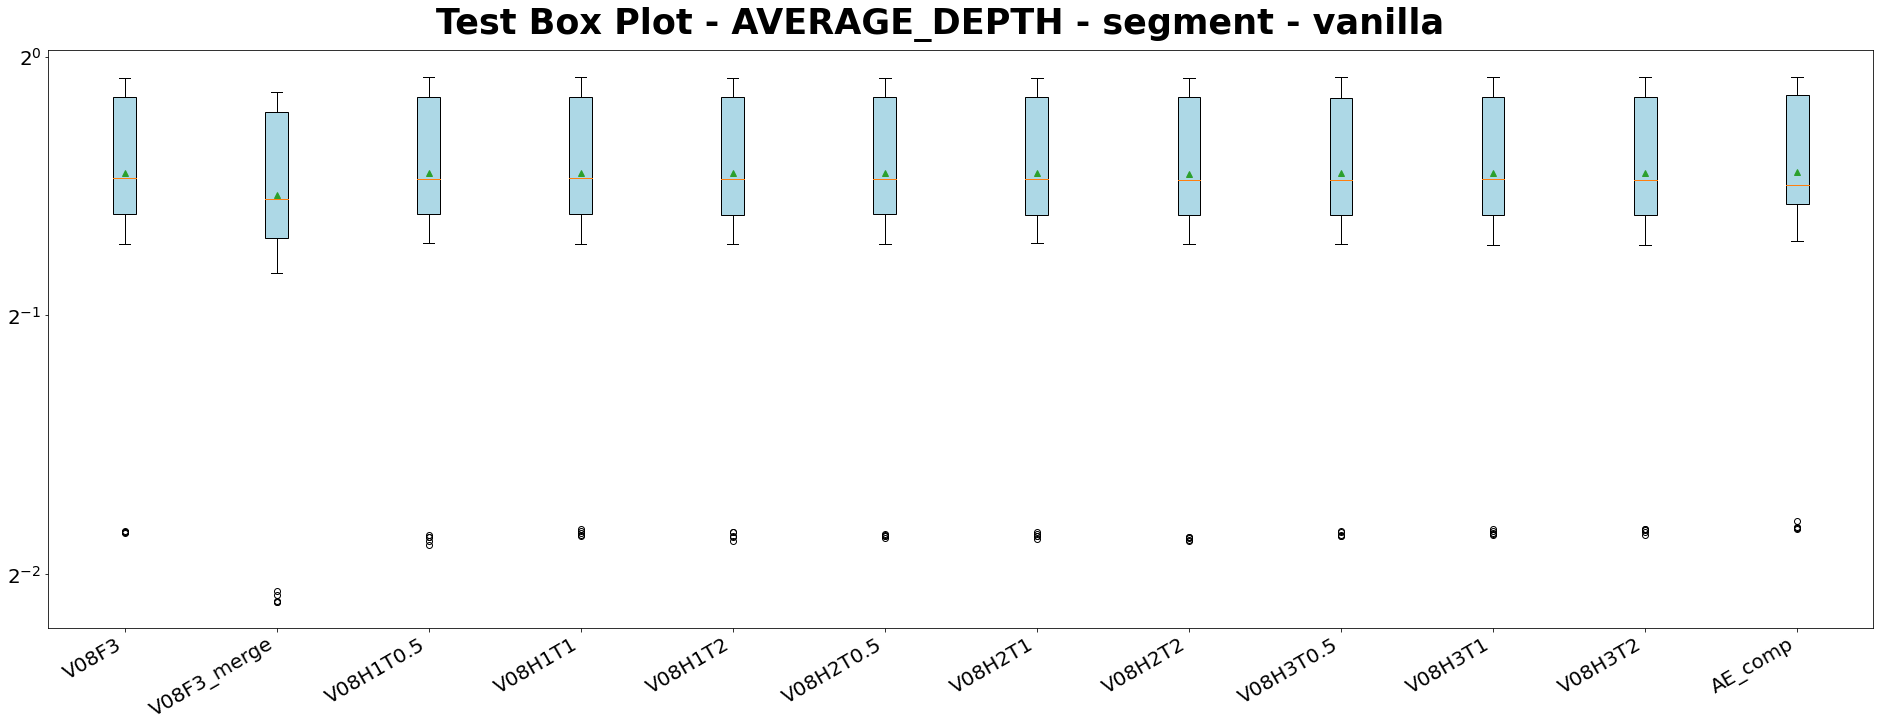

In [6]:
#RP.sample()
RP.resize()
RP.cuda = 1
RP.matching_mae()
RP.segment_mean()
for item in ('mse', 'matched_mae', 'distance', 'matched_mae(m)', 'average_depth'):
    for level in ('sample', 'segment'):
        RP.boxplot(item=item, level=level, source='vanilla')
        #RP.cdfplot(item=item, level=level, source='vanilla')

In [ ]:
print(RP.subjects['Proposed'].preds['TR_PRED'].shape)

### Visualizations

<Figure size 1872x720 with 0 Axes>

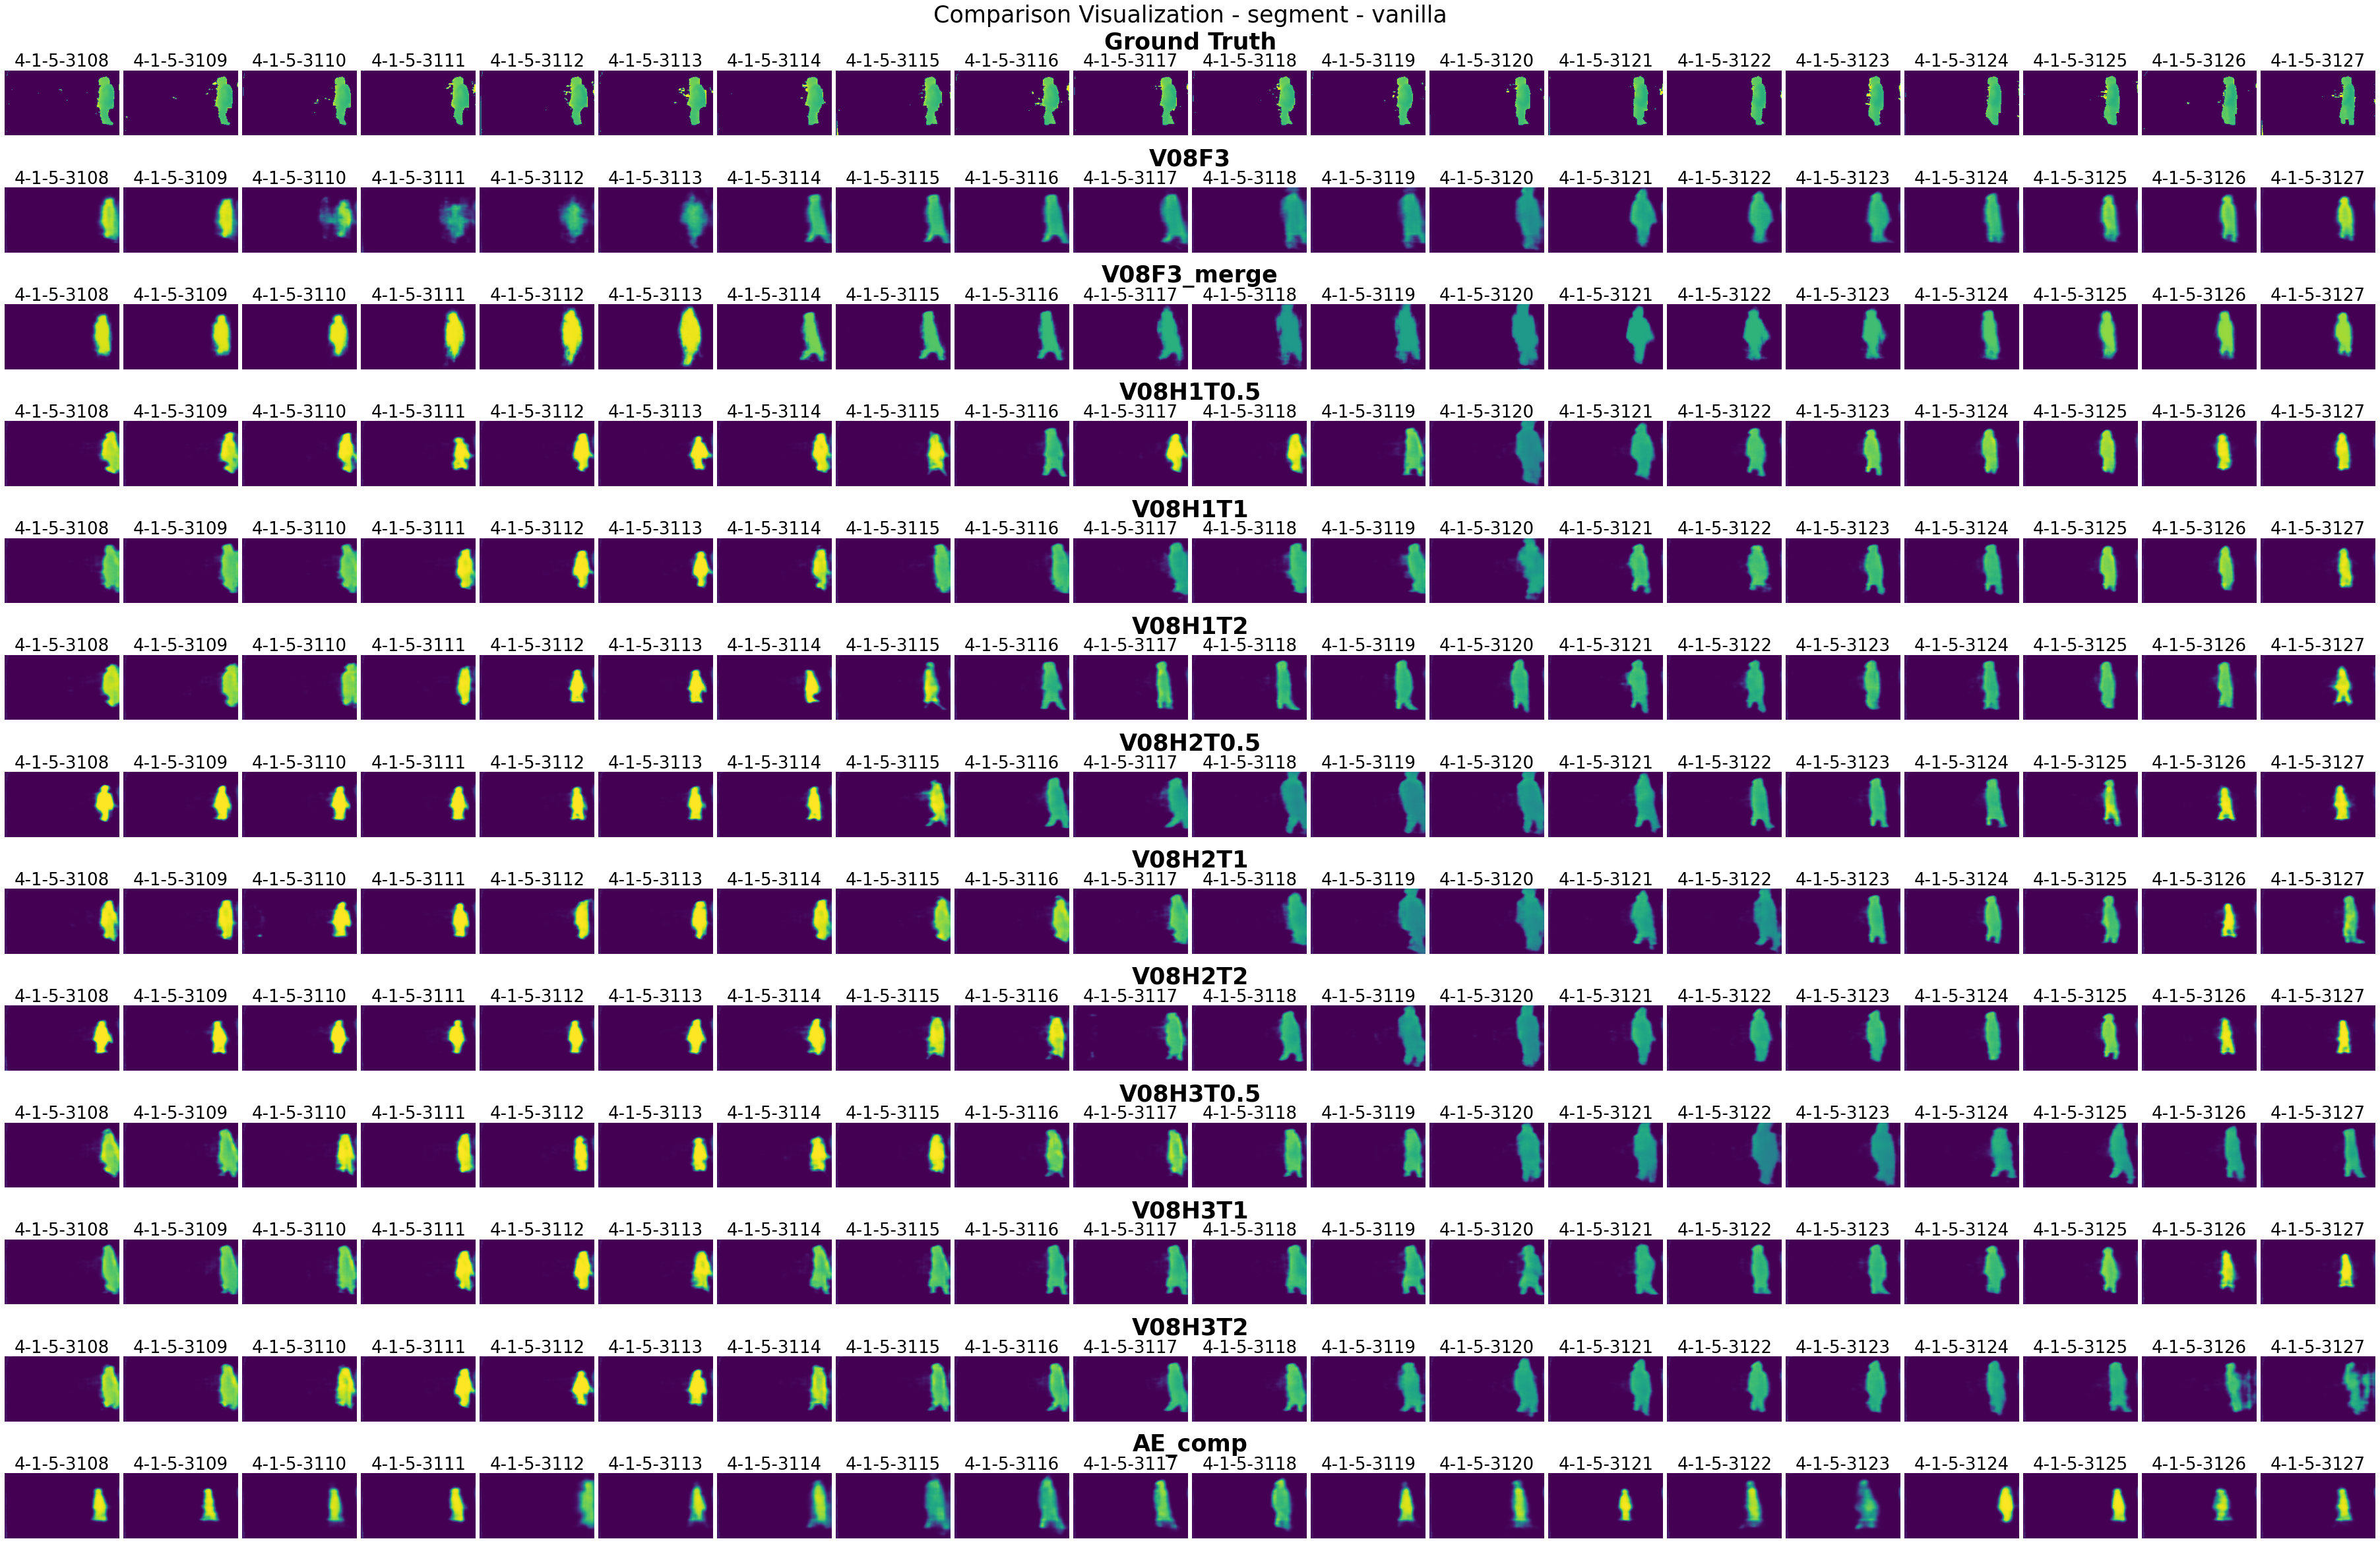

In [7]:
RP._visualization.seg_selected = None
RP.visualize(matched=False, level='segment', source='vanilla')
#RP.visualize(matched=True, level='segment', source='vanilla')

<Figure size 3600x2340 with 0 Axes>

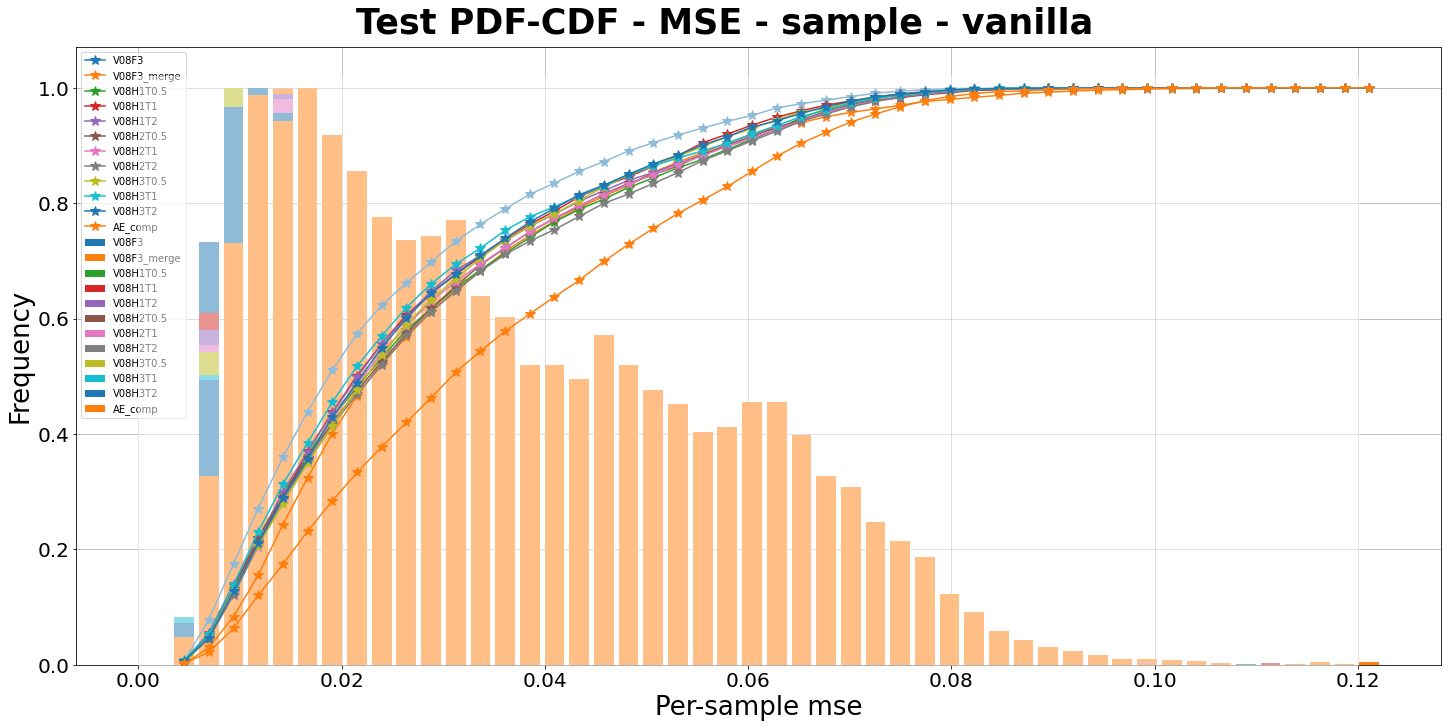

In [8]:
RP.cdfplot()

### Post-processing

30Center post processing...Done!
30Center reconstructing...


  0%|          | 0/5701 [00:00<?, ?it/s]

/home/bob/datastore/Models/Comparison_v2.py:521: UserWarning: Using a target size (torch.Size([1, 128, 226])) that is different to the input size (torch.Size([128, 226])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  torch.from_numpy(self.gt[gt_ind])).numpy()


Done
 Reconstruction finished. Failure count = 0
30Center calculating 2D correlation...

  0%|          | 0/5701 [00:00<?, ?it/s]

Done!
30Center_WIL post processing...Done!
30Center_WIL reconstructing...


  0%|          | 0/5701 [00:00<?, ?it/s]

Done
 Reconstruction finished. Failure count = 0
30Center_WIL calculating 2D correlation...

  0%|          | 0/5701 [00:00<?, ?it/s]

Done!
100Center post processing...Done!
100Center reconstructing...


  0%|          | 0/5599 [00:00<?, ?it/s]

Done
 Reconstruction finished. Failure count = 0
100Center calculating 2D correlation...

  0%|          | 0/5599 [00:00<?, ?it/s]

Done!
100Center_WIL post processing...Done!
100Center_WIL reconstructing...


  0%|          | 0/5599 [00:00<?, ?it/s]

Done
 Reconstruction finished. Failure count = 0
100Center_WIL calculating 2D correlation...

  0%|          | 0/5599 [00:00<?, ?it/s]

Done!
300Center post processing...Done!
300Center reconstructing...


  0%|          | 0/5299 [00:00<?, ?it/s]

Done
 Reconstruction finished. Failure count = 0
300Center calculating 2D correlation...

  0%|          | 0/5299 [00:00<?, ?it/s]

Done!
300Center_WIL post processing...Done!
300Center_WIL reconstructing...


  0%|          | 0/5299 [00:00<?, ?it/s]

Done
 Reconstruction finished. Failure count = 0
300Center_WIL calculating 2D correlation...

  0%|          | 0/5299 [00:00<?, ?it/s]

Done!
30Center calculating segment mean...Done
30Center_WIL calculating segment mean...Done
100Center calculating segment mean...Done
100Center_WIL calculating segment mean...Done
300Center calculating segment mean...Done
300Center_WIL calculating segment mean...Done


<Figure size 3600x1620 with 0 Axes>

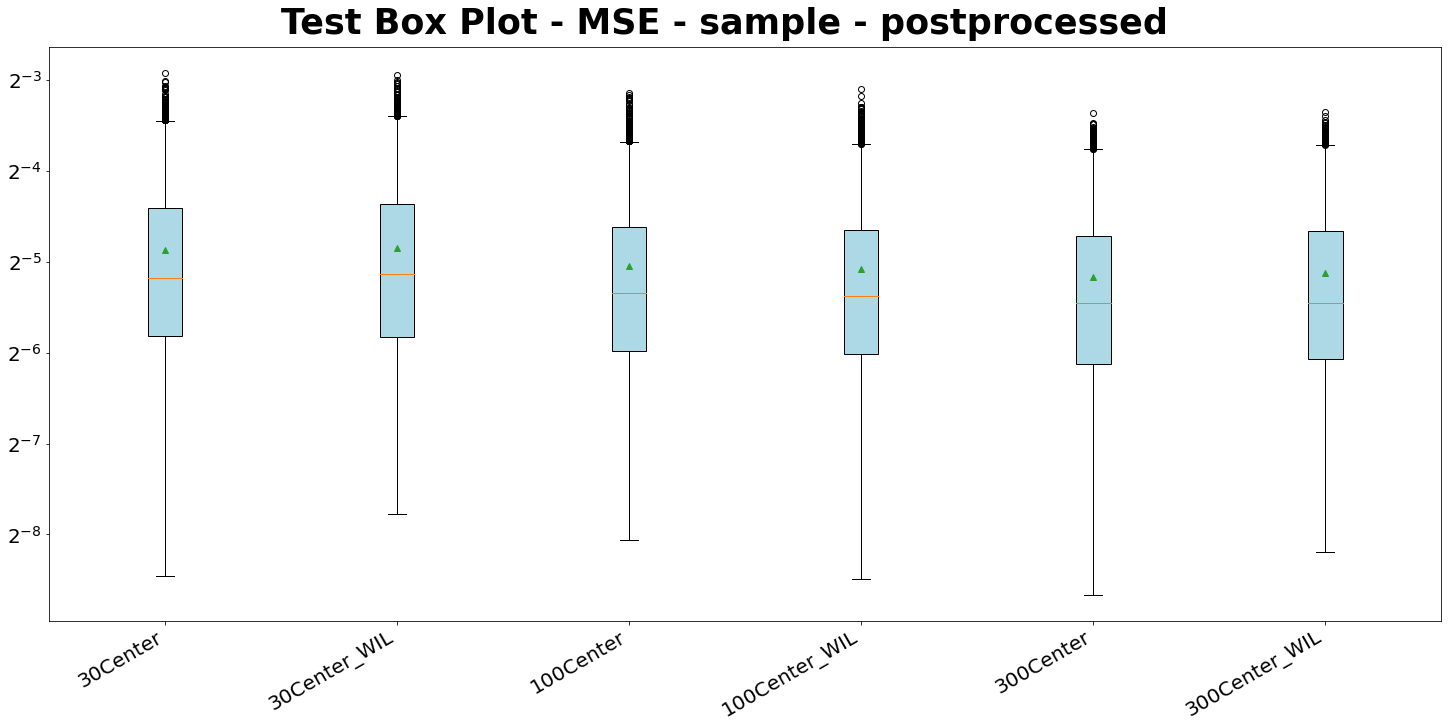

<Figure size 1440x720 with 0 Axes>

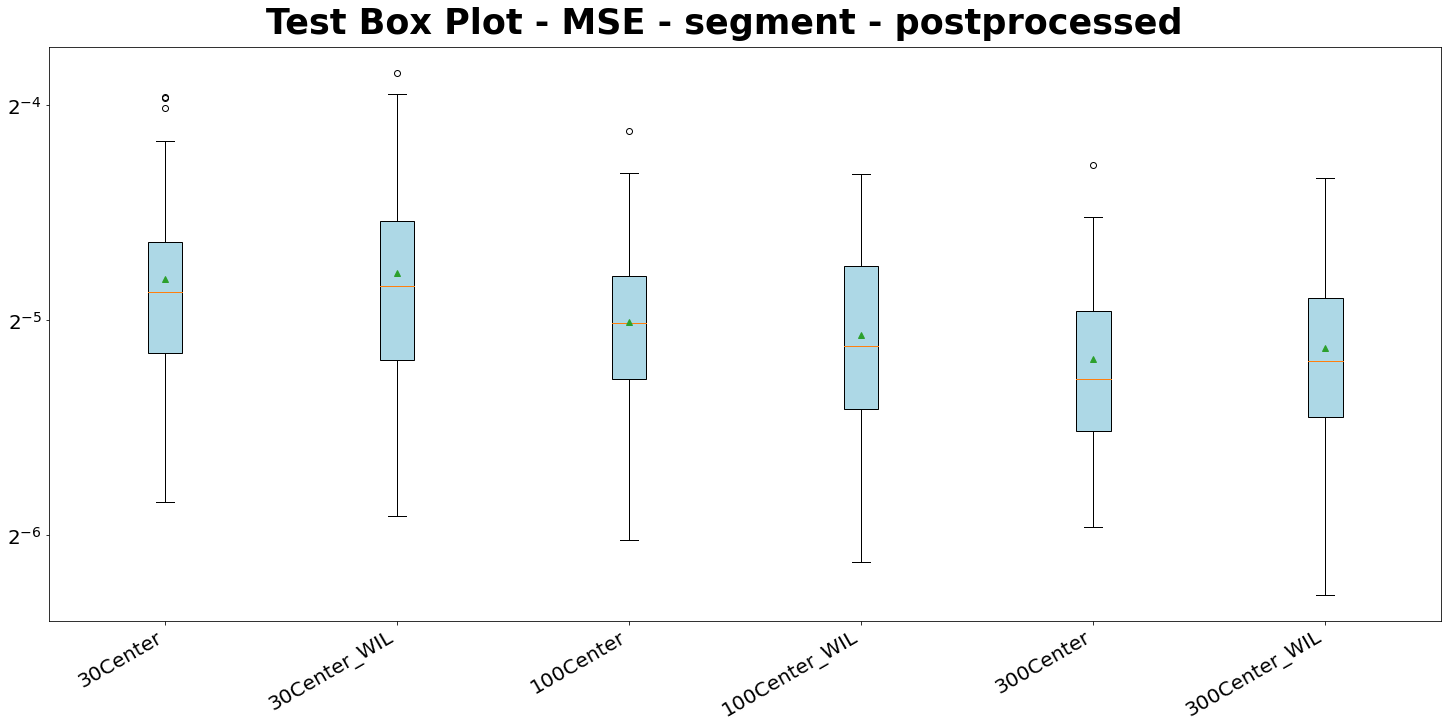

<Figure size 1440x720 with 0 Axes>

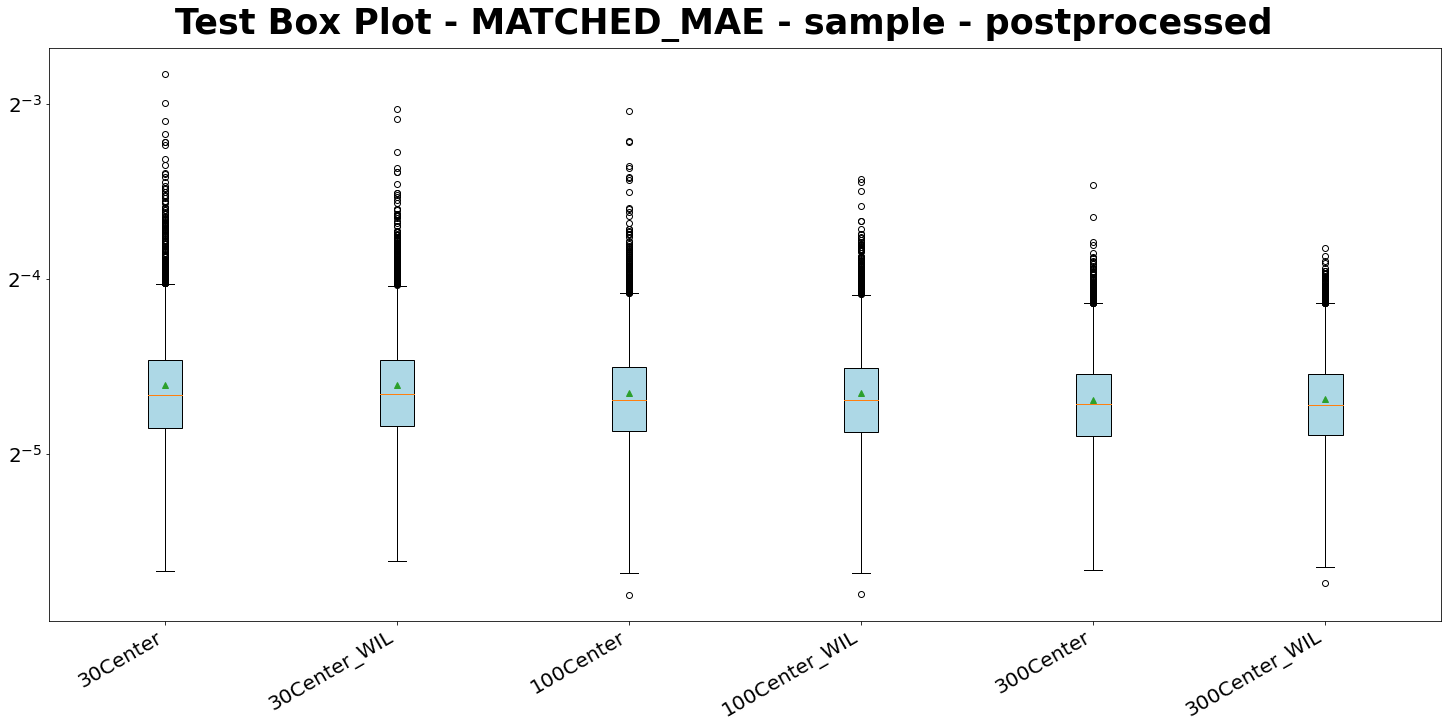

<Figure size 1440x720 with 0 Axes>

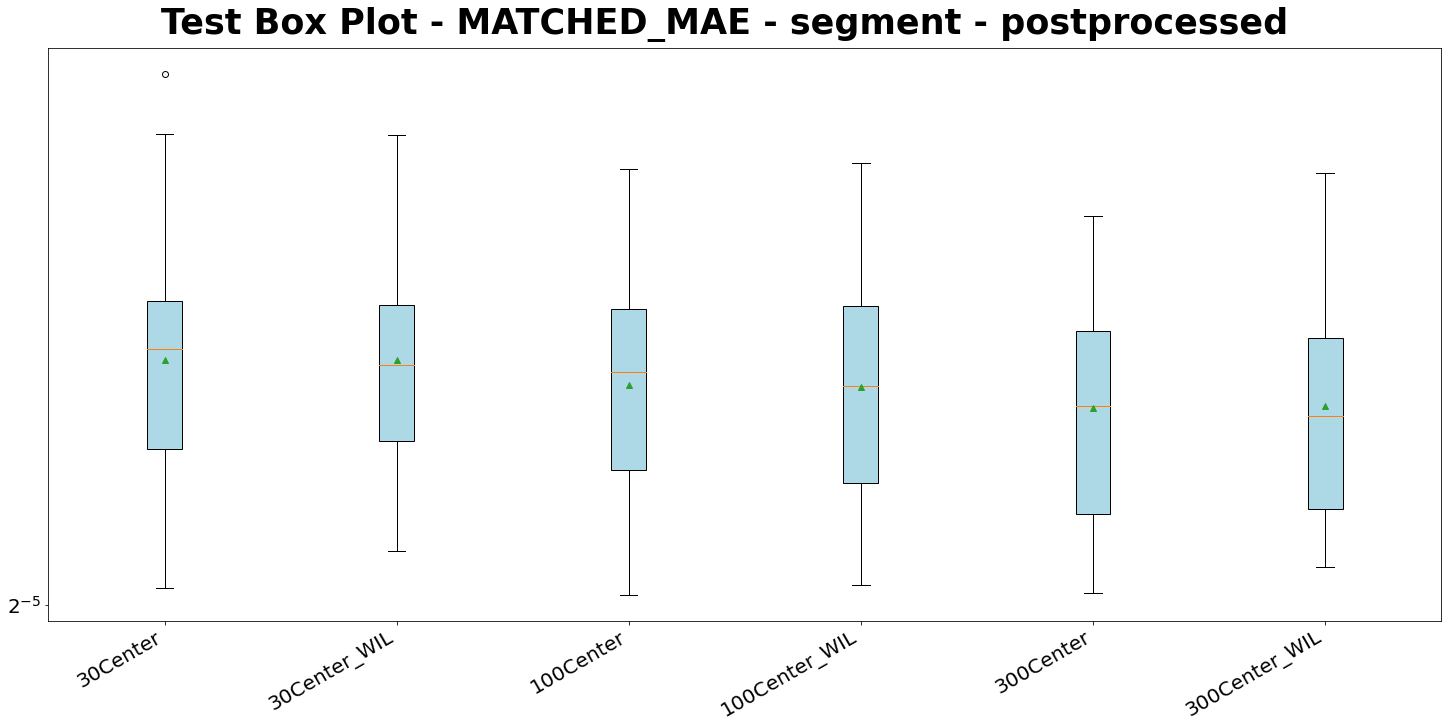

<Figure size 1440x720 with 0 Axes>

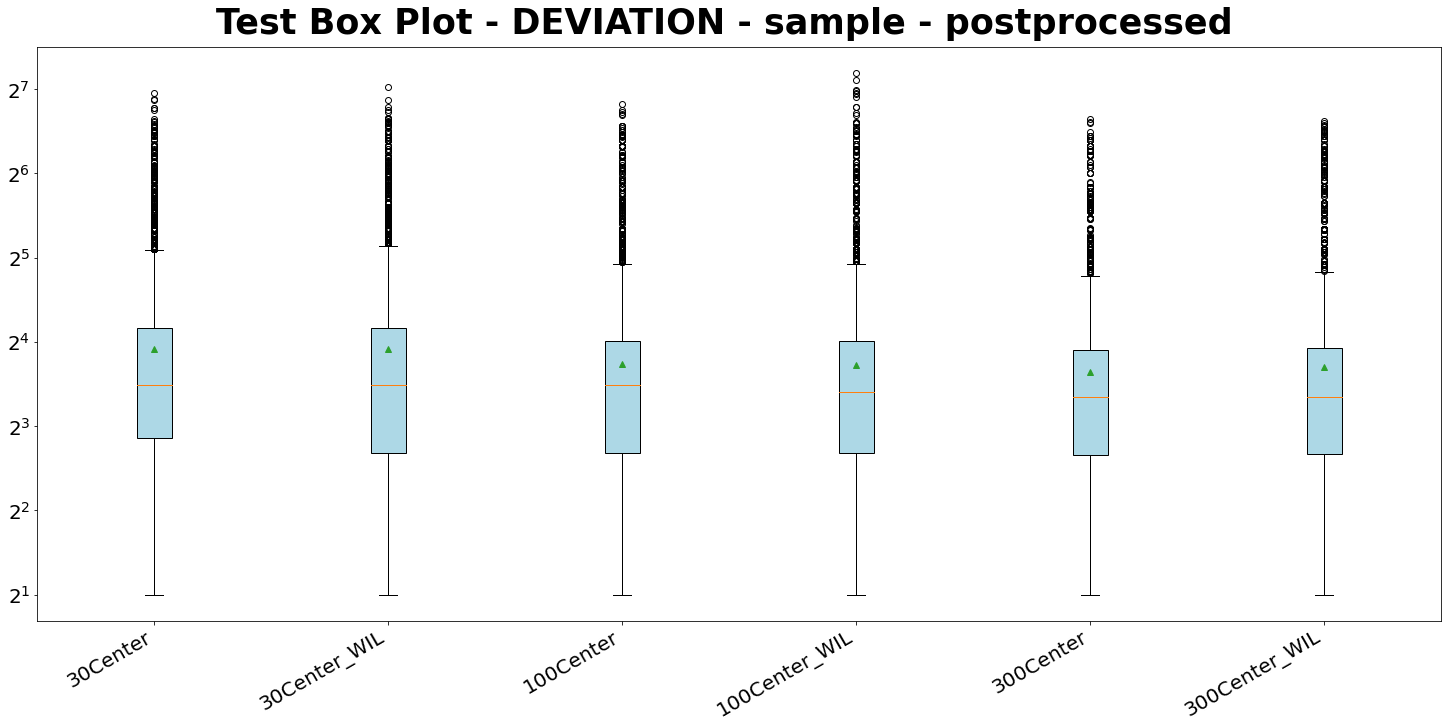

<Figure size 1440x720 with 0 Axes>

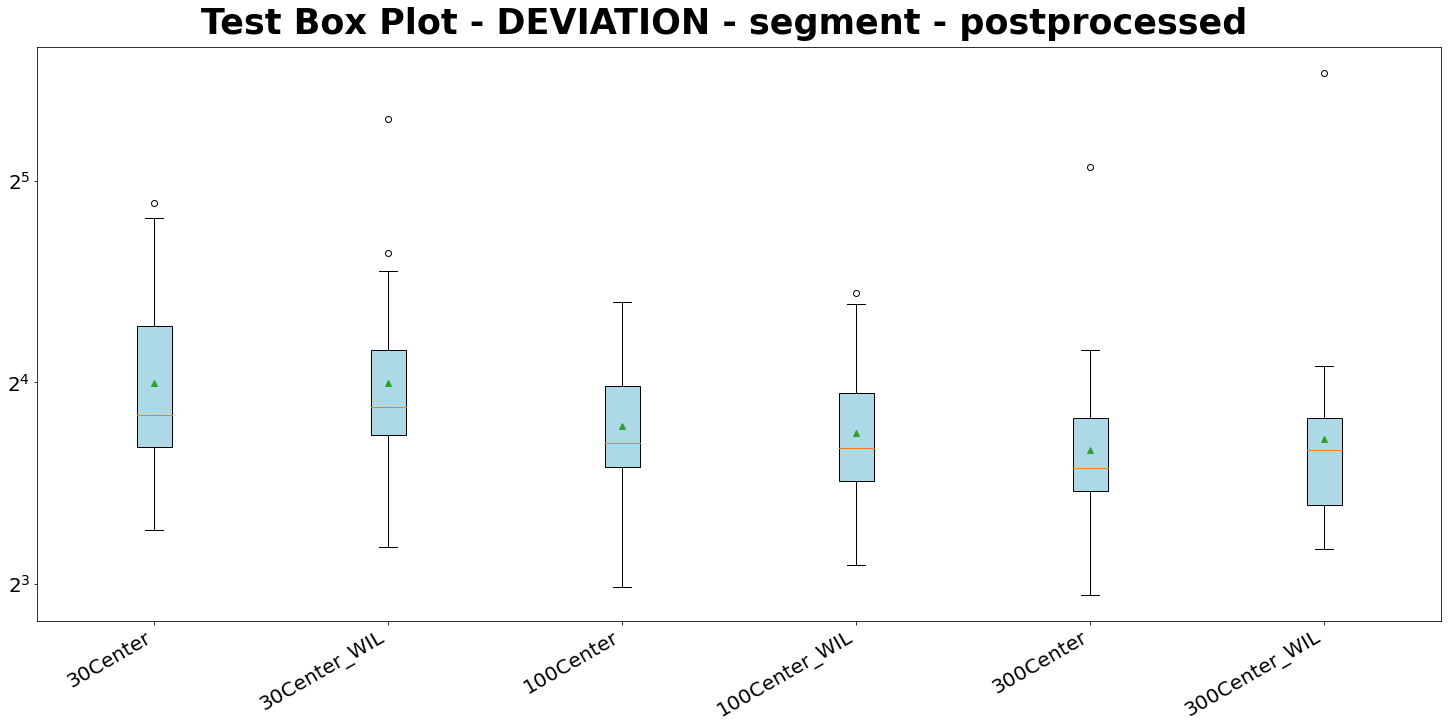

<Figure size 1440x720 with 0 Axes>

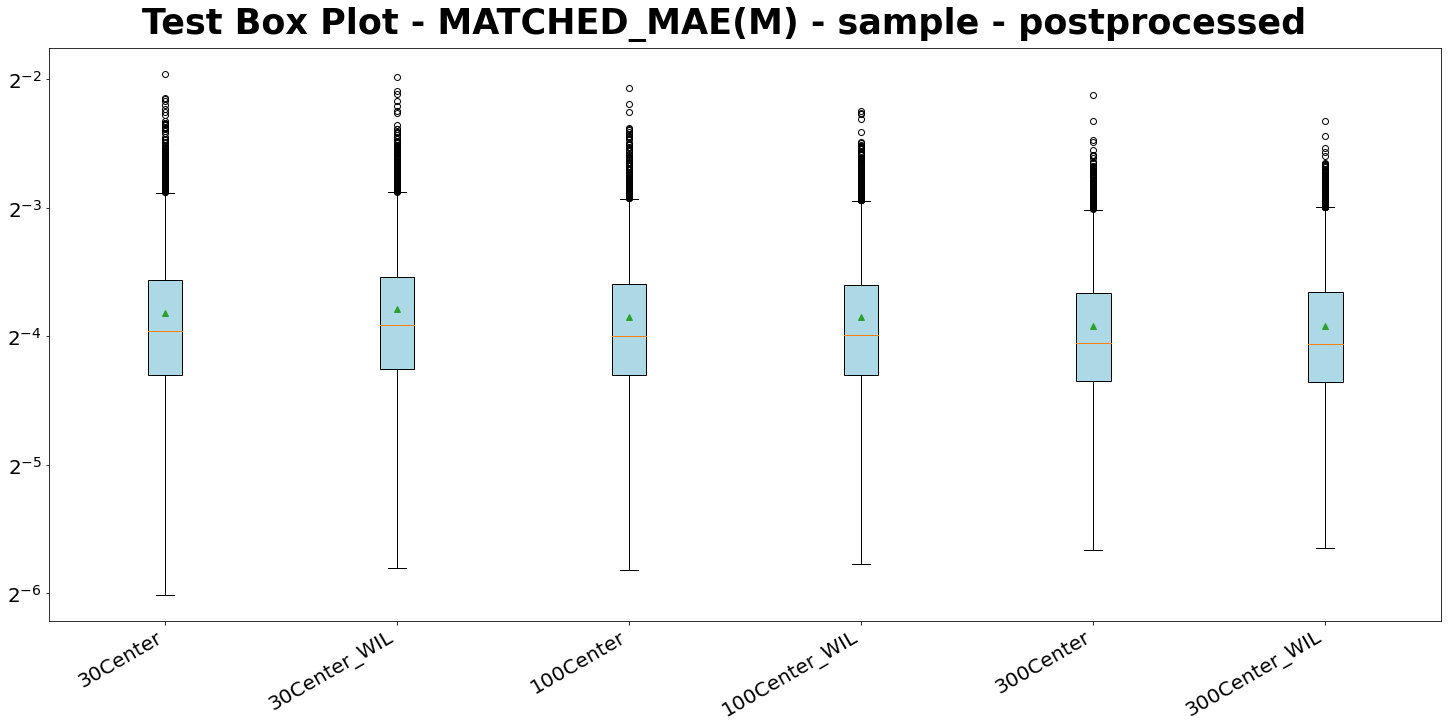

<Figure size 1440x720 with 0 Axes>

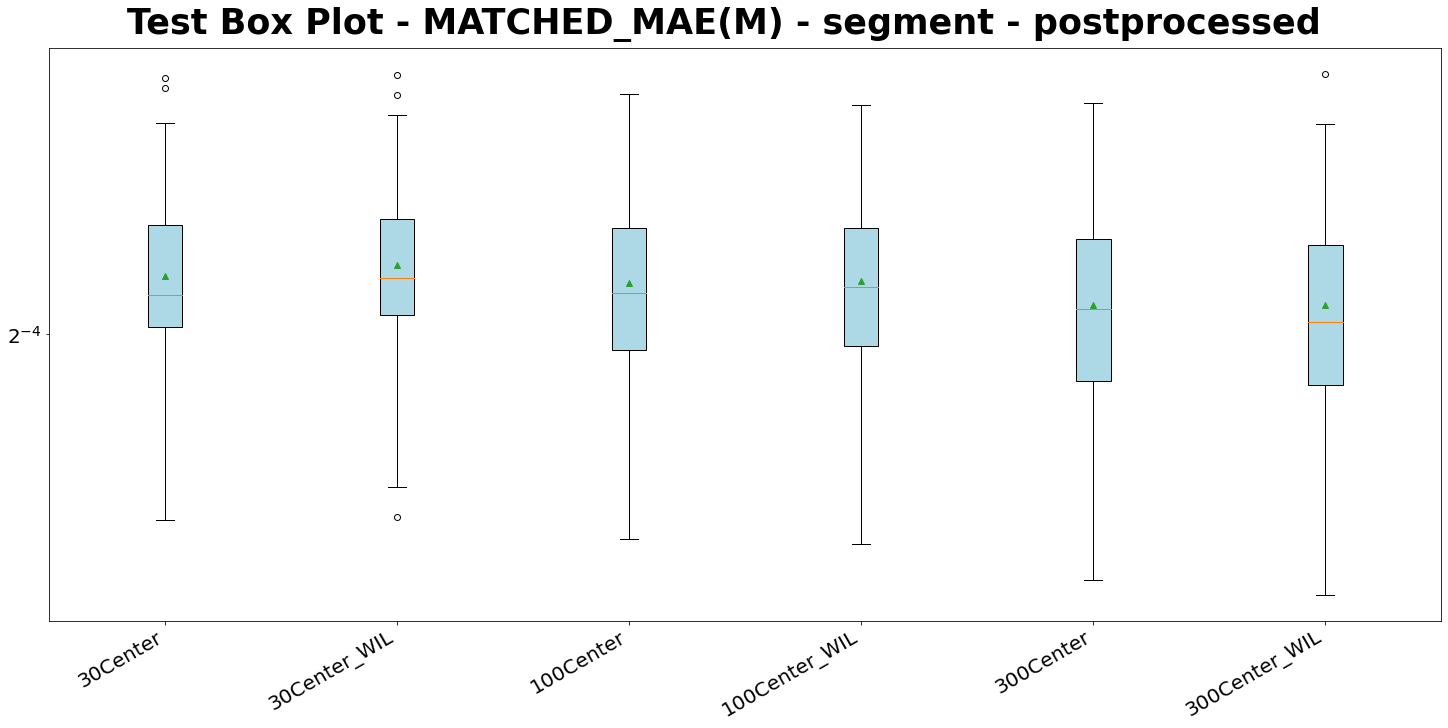

<Figure size 1440x720 with 0 Axes>

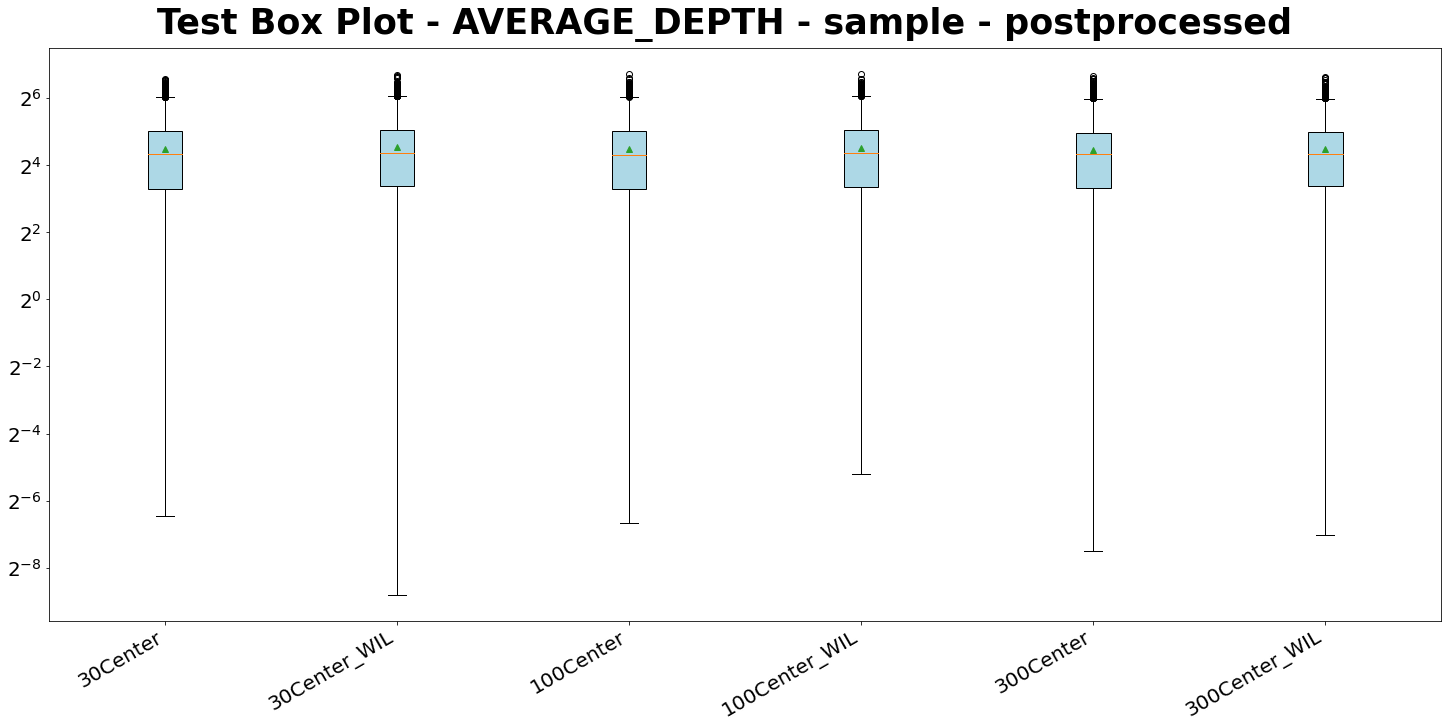

<Figure size 1440x720 with 0 Axes>

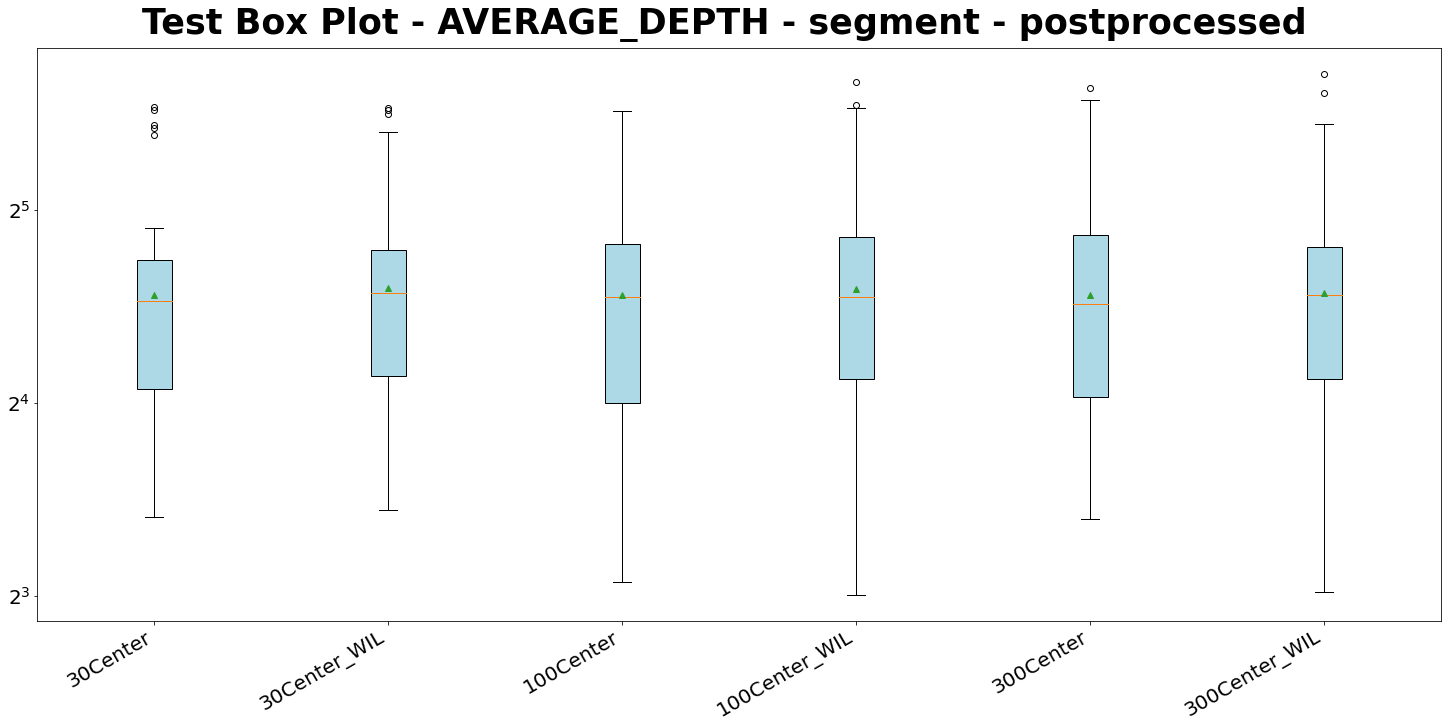

In [9]:
RP.post_process(scope=['30Center', '30Center_WIL', 
                       '100Center', '100Center_WIL', 
                       '300Center', '300Center_WIL'])
RP.segment_mean(scope=['30Center', '30Center_WIL', 
                       '100Center', '100Center_WIL', 
                       '300Center', '300Center_WIL'],
                source='postprocessed')
for item in ('mse', 'matched_mae', 'deviation', 'matched_mae(m)', 'average_depth'):
    for level in ('sample', 'segment'):
        #RP.cdfplot(scope=['30Center', '30Center_IL', '30Center_WIL', '100Center', '100Center_IL', '100Center_WIL', '300Center', '300Center_IL', '300Center_WIL'],
        #           item=item, level=level, source='postprocessed')
        RP.boxplot(scope=['30Center', '30Center_WIL', '100Center', '100Center_WIL', '300Center', '300Center_WIL'],
            item=item, level=level, source='postprocessed')

<Figure size 1440x720 with 0 Axes>

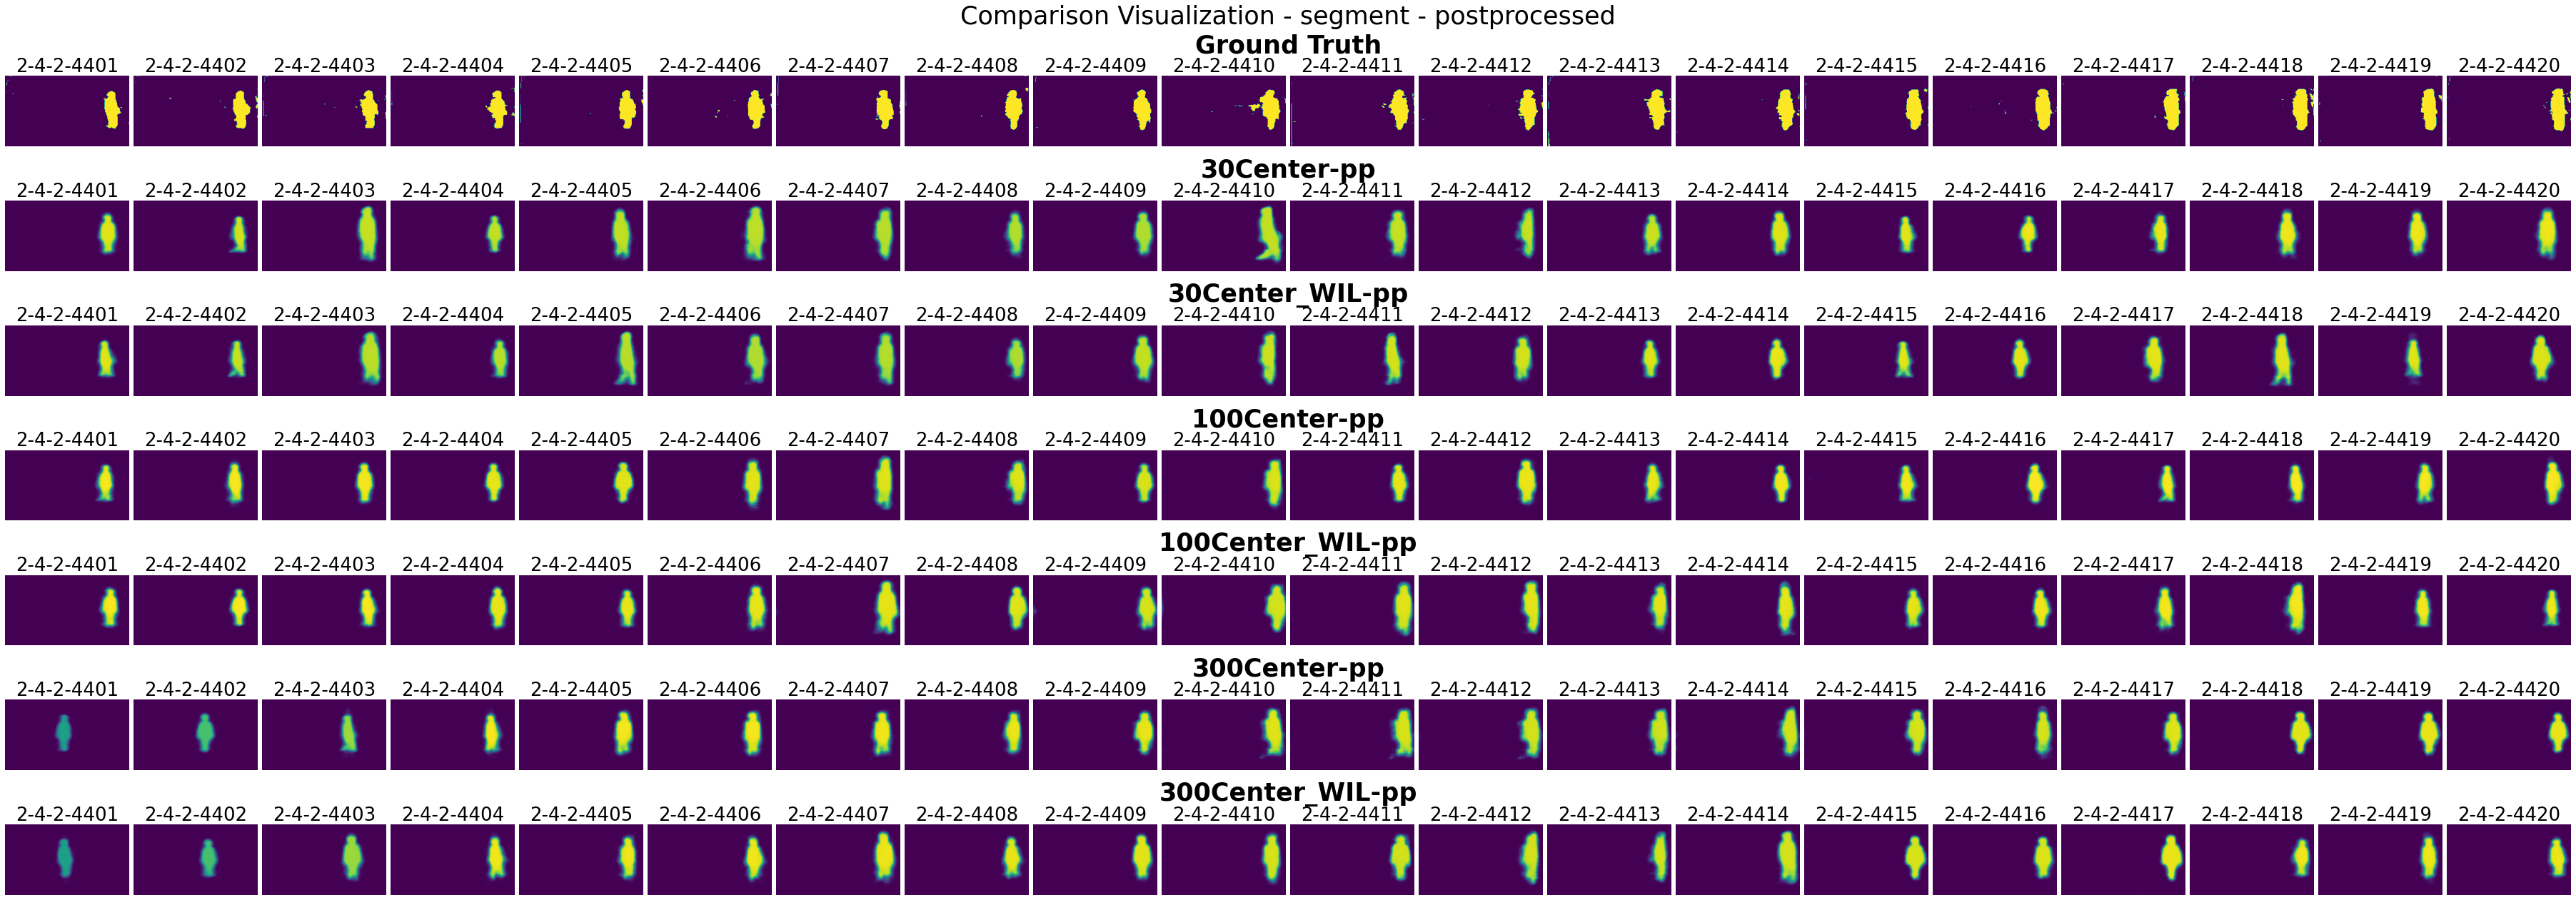

/opt/conda/lib/python3.7/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


<Figure size 3600x1260 with 0 Axes>

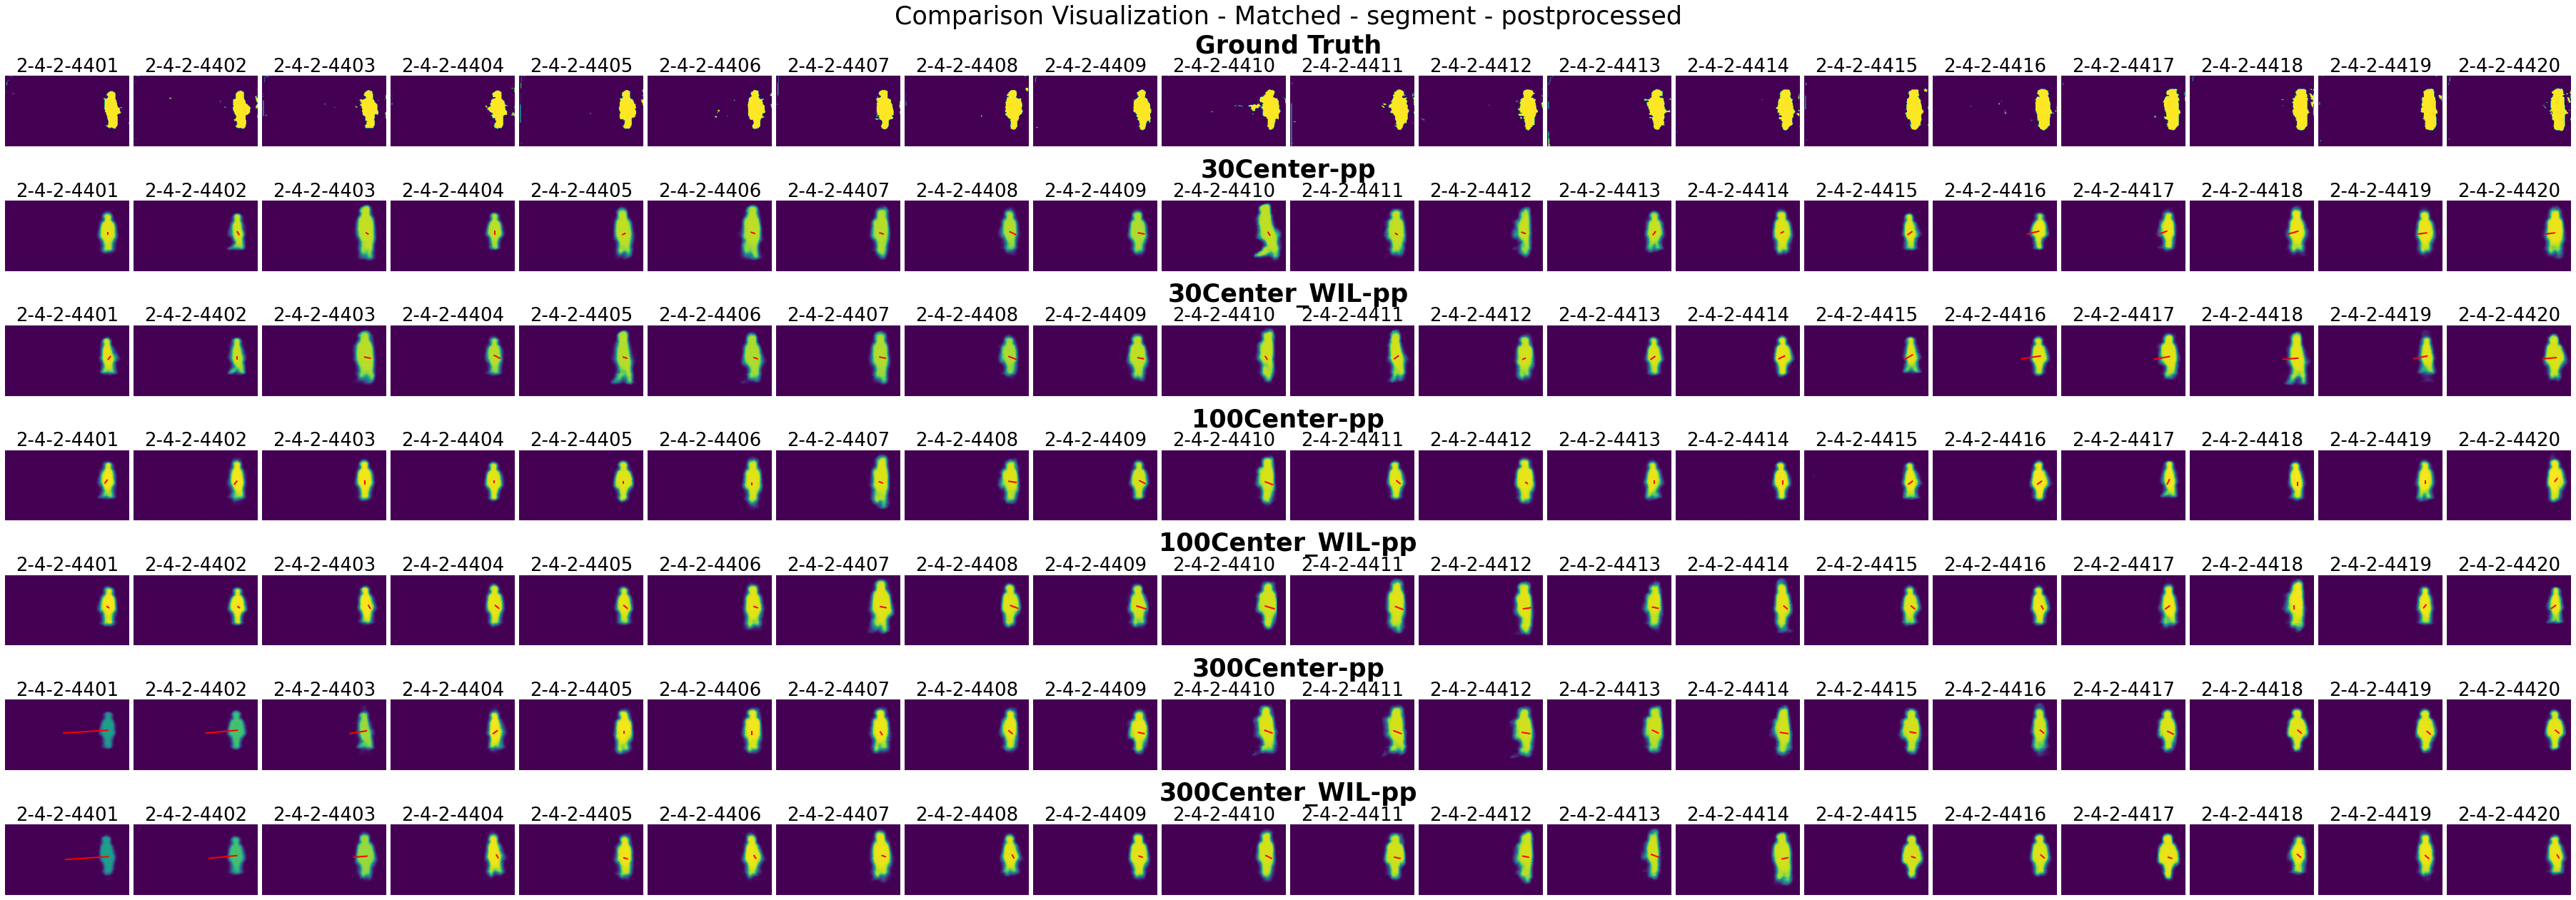

In [10]:
RP.visualize(scope=['30Center', '30Center_WIL', '100Center', '100Center_WIL', '300Center', '300Center_WIL'],
                          #selected=RP.selected_segs, 
             matched=False, level='segment', source='postprocessed')
RP.visualize(scope=['30Center', '30Center_WIL', '100Center', '100Center_WIL', '300Center', '300Center_WIL'],
             #selected=RP.selected_segs, 
             matched=True, level='segment', source='postprocessed')

### Table

In [9]:
RP.average_table()

              vanilla                                                     \
               sample                                                      
                  mse matched_mae matched_mae(m) average_depth est_depth   
V08F3        0.024015    0.057965       0.097095      0.739102  0.052617   
V08F3_merge  0.028974    0.063403       0.102609      0.696907  0.094812   
V08H1T0.5    0.027999    0.058071       0.096239       0.73847  0.053249   
V08H1T1      0.026925     0.05779       0.095616      0.739207  0.052511   
V08H1T2      0.027328    0.058142       0.096274      0.738508  0.053211   
V08H2T0.5    0.027937    0.058063       0.095896      0.738739  0.052979   
V08H2T1       0.02787    0.057983       0.095859      0.738521  0.053198   
V08H2T2      0.028531    0.058038       0.096125       0.73788  0.053839   
V08H3T0.5    0.027384    0.058016       0.096418      0.738476  0.053243   
V08H3T1      0.026608    0.057974       0.095992      0.738601  0.053118   
V08H3T2     

In [12]:
RP.save('240818Comp_Comps')

In [13]:
for sub in RP.subjects.values():
    sub.save('240818_Comp')

30Center saving...Done!
100Center saving...Done!
300Center saving...Done!
30Center_WIL saving...Done!
100Center_WIL saving...Done!
300Center_WIL saving...Done!
300BBX_FP saving...Done!
AE saving...Done!


<Figure size 1440x720 with 0 Axes>

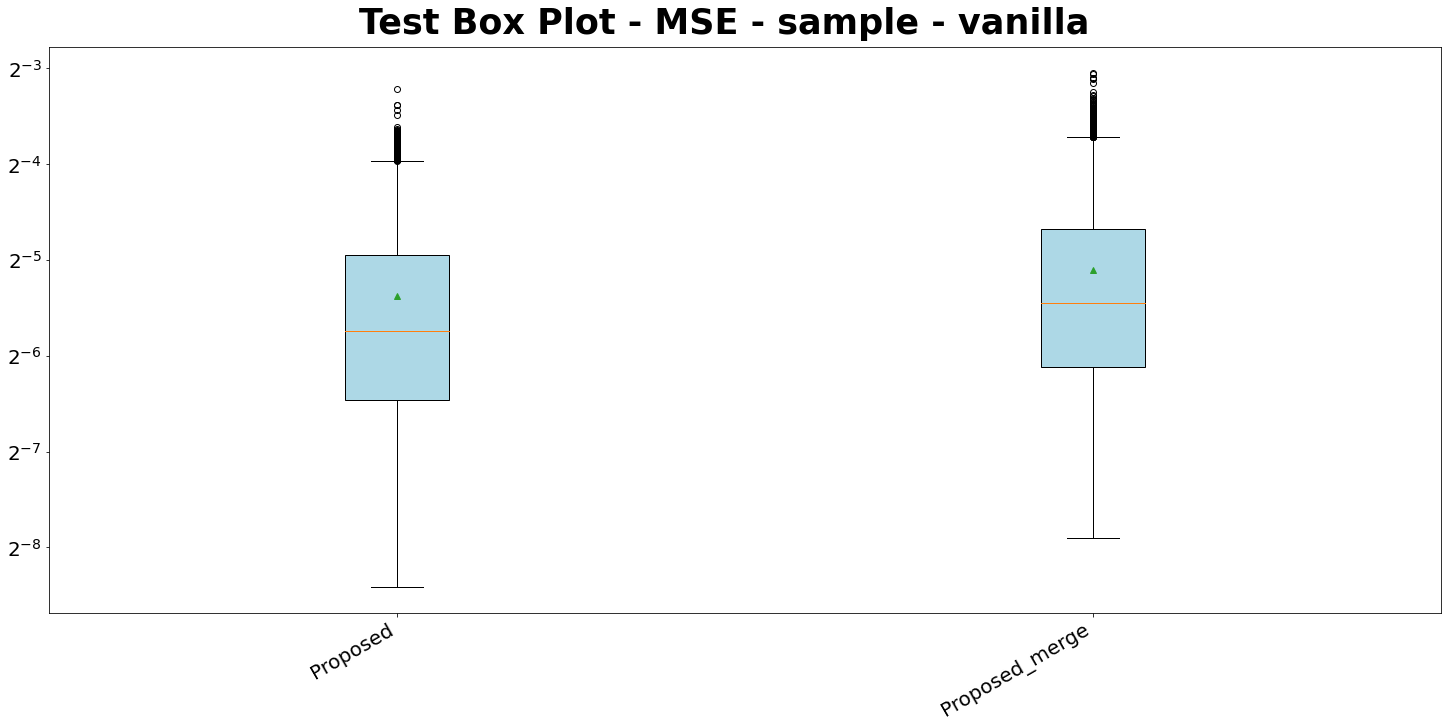

<Figure size 1440x720 with 0 Axes>

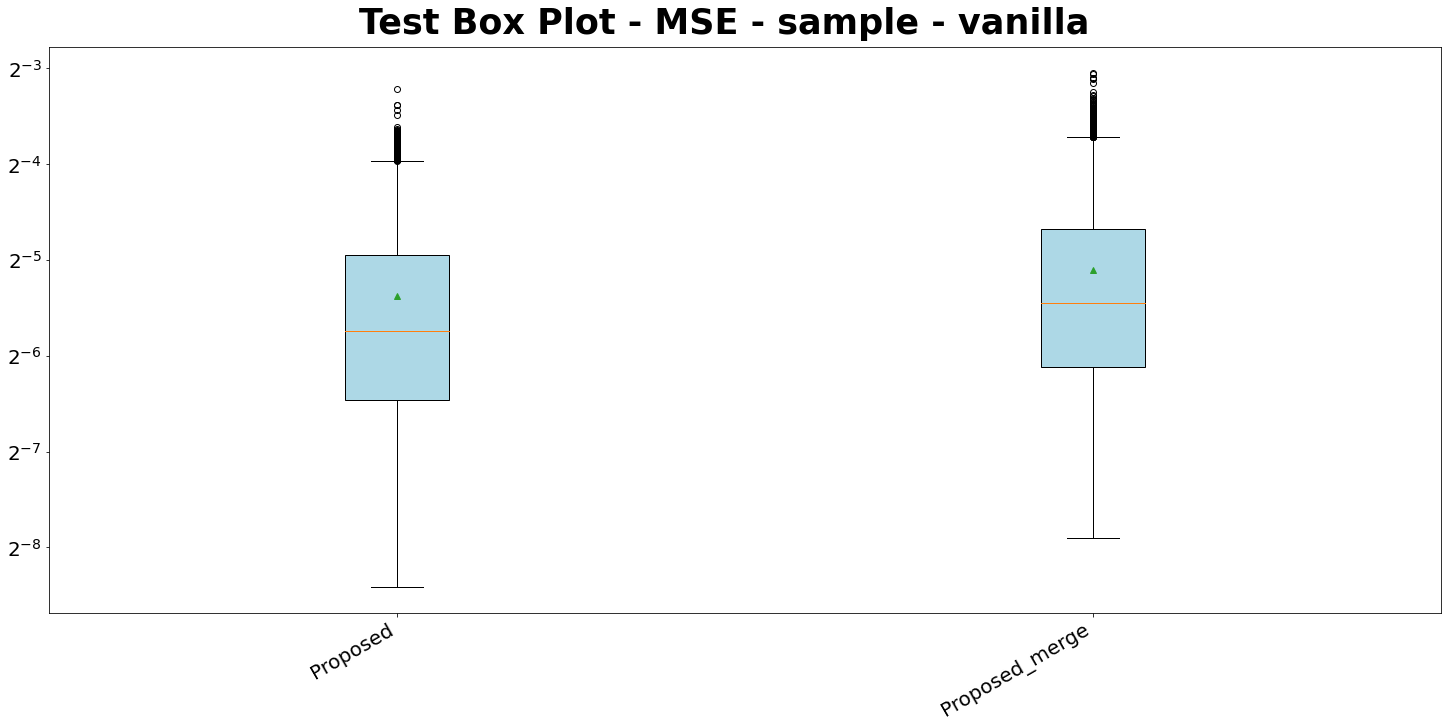

<Figure size 1440x720 with 0 Axes>

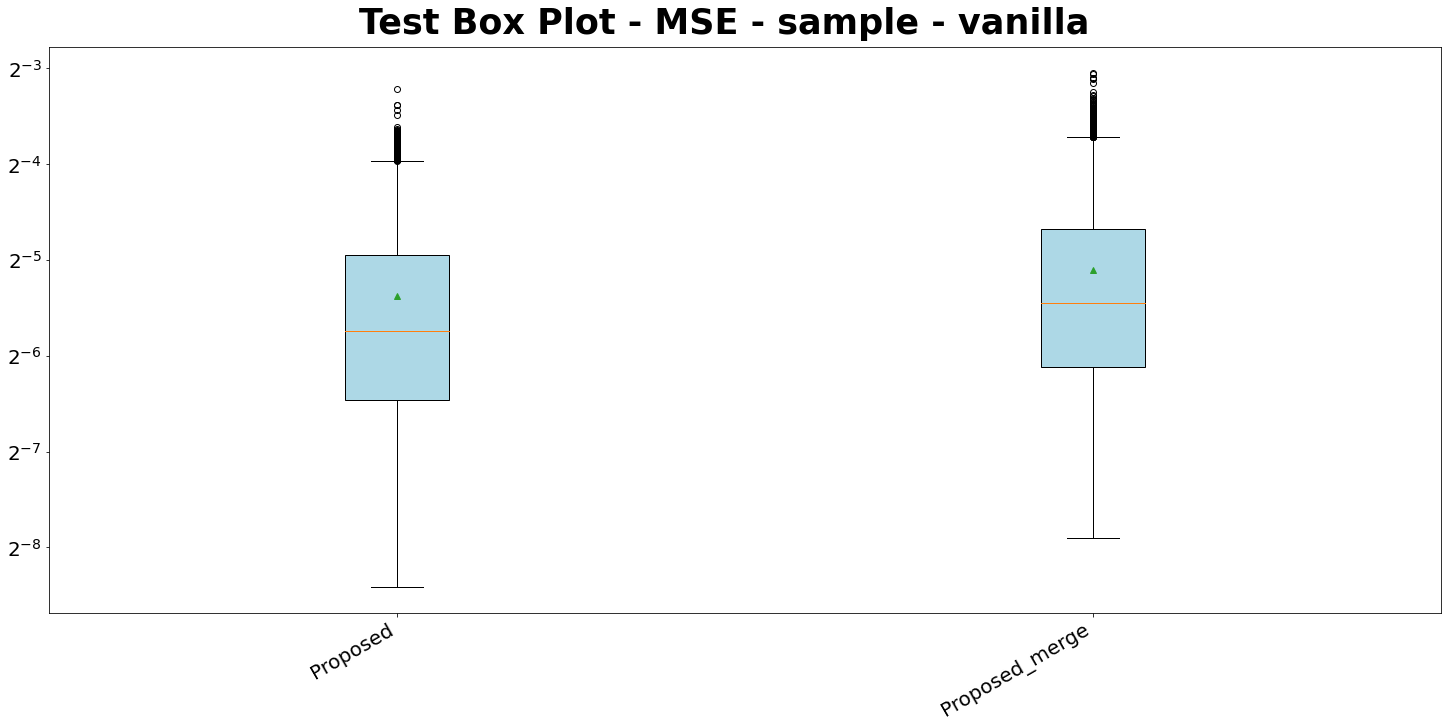

<Figure size 1440x720 with 0 Axes>

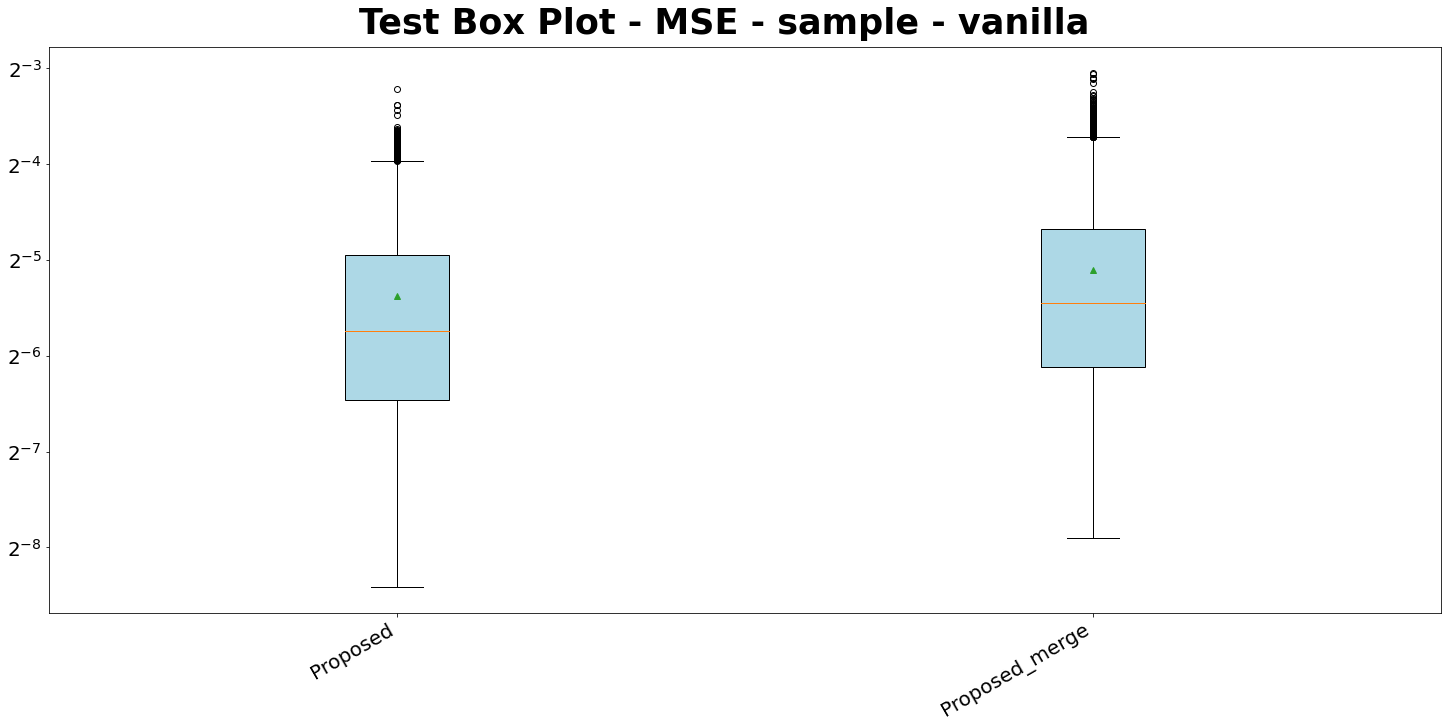

<Figure size 1440x720 with 0 Axes>

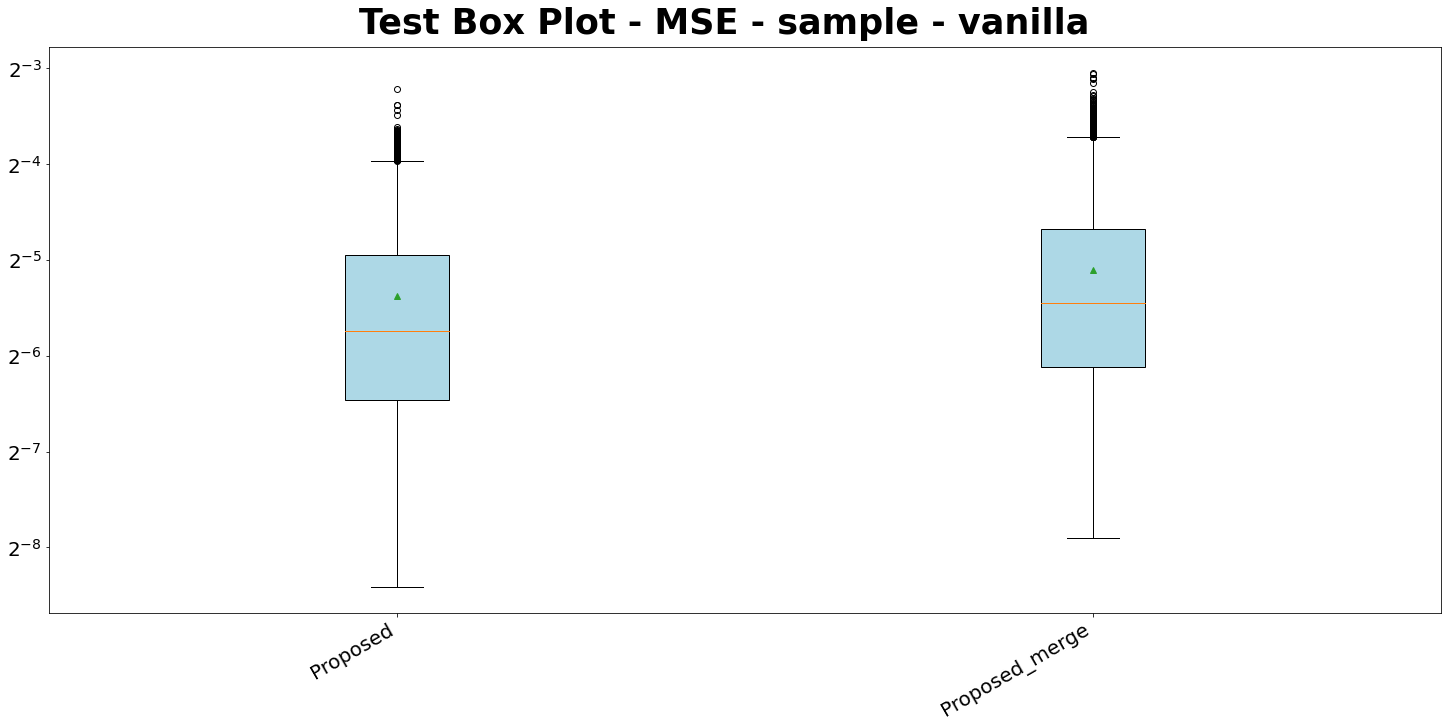

<Figure size 1440x720 with 0 Axes>

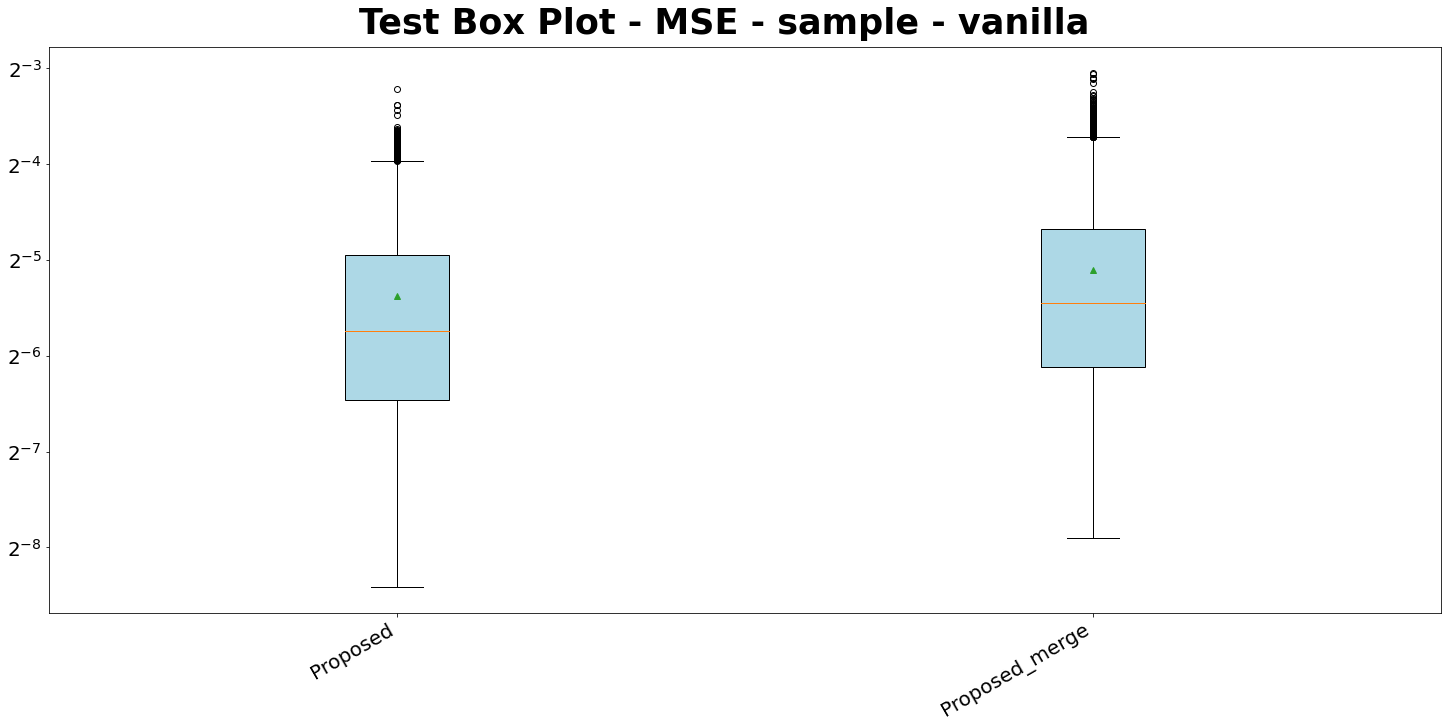

<Figure size 1440x720 with 0 Axes>

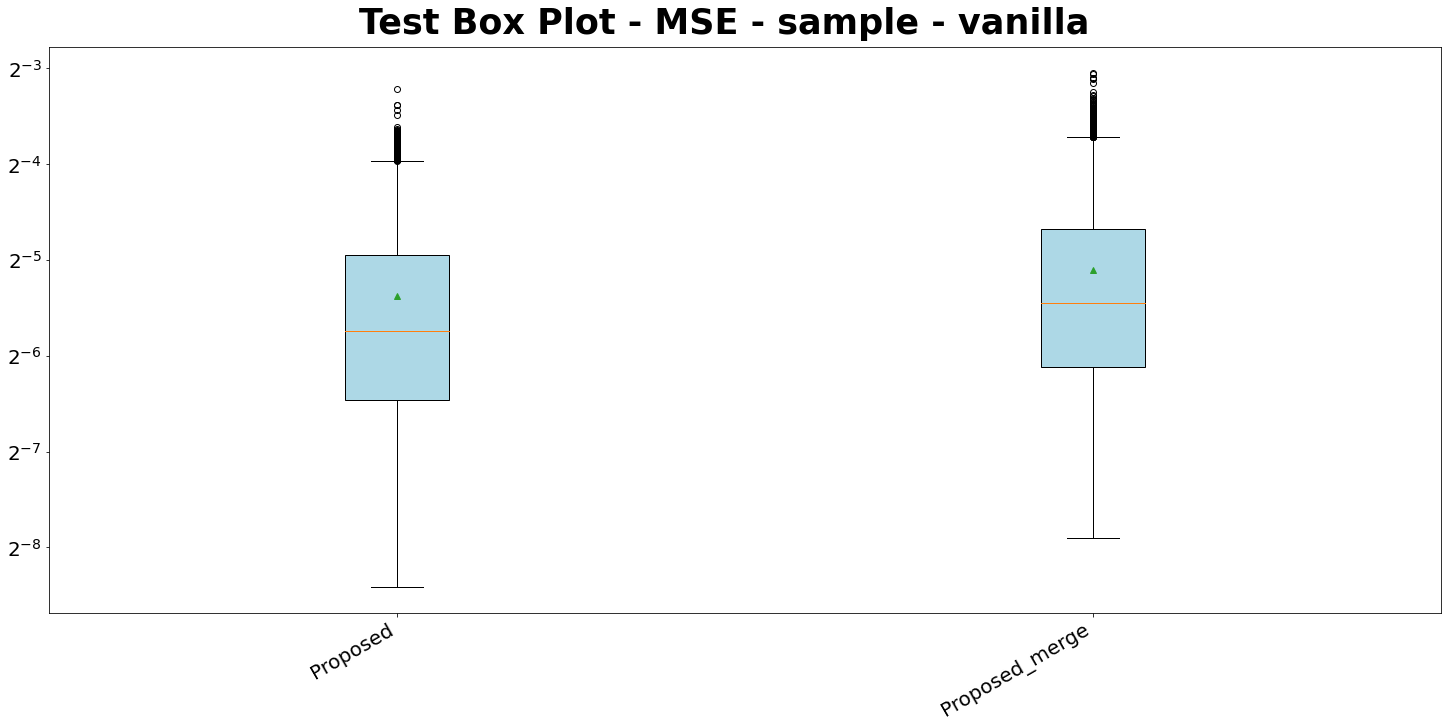

<Figure size 1440x720 with 0 Axes>

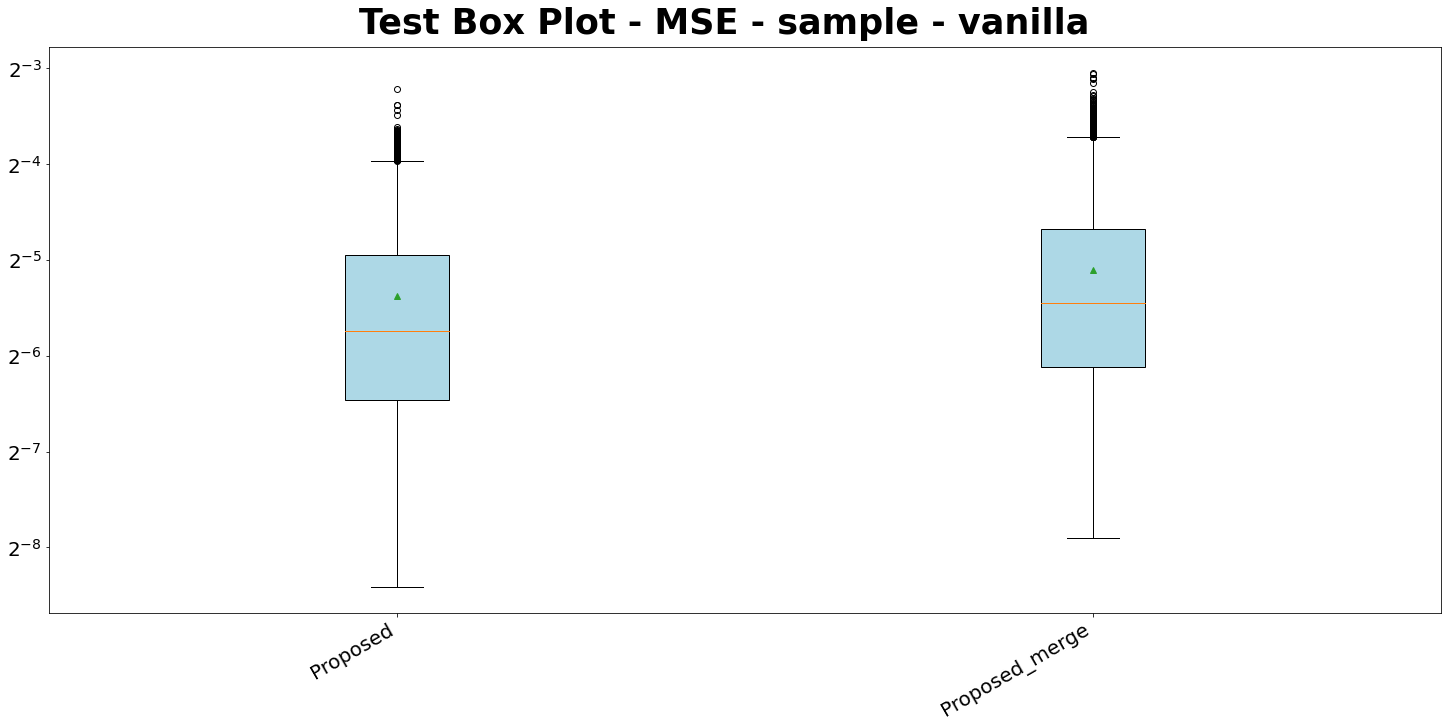

<Figure size 1440x720 with 0 Axes>

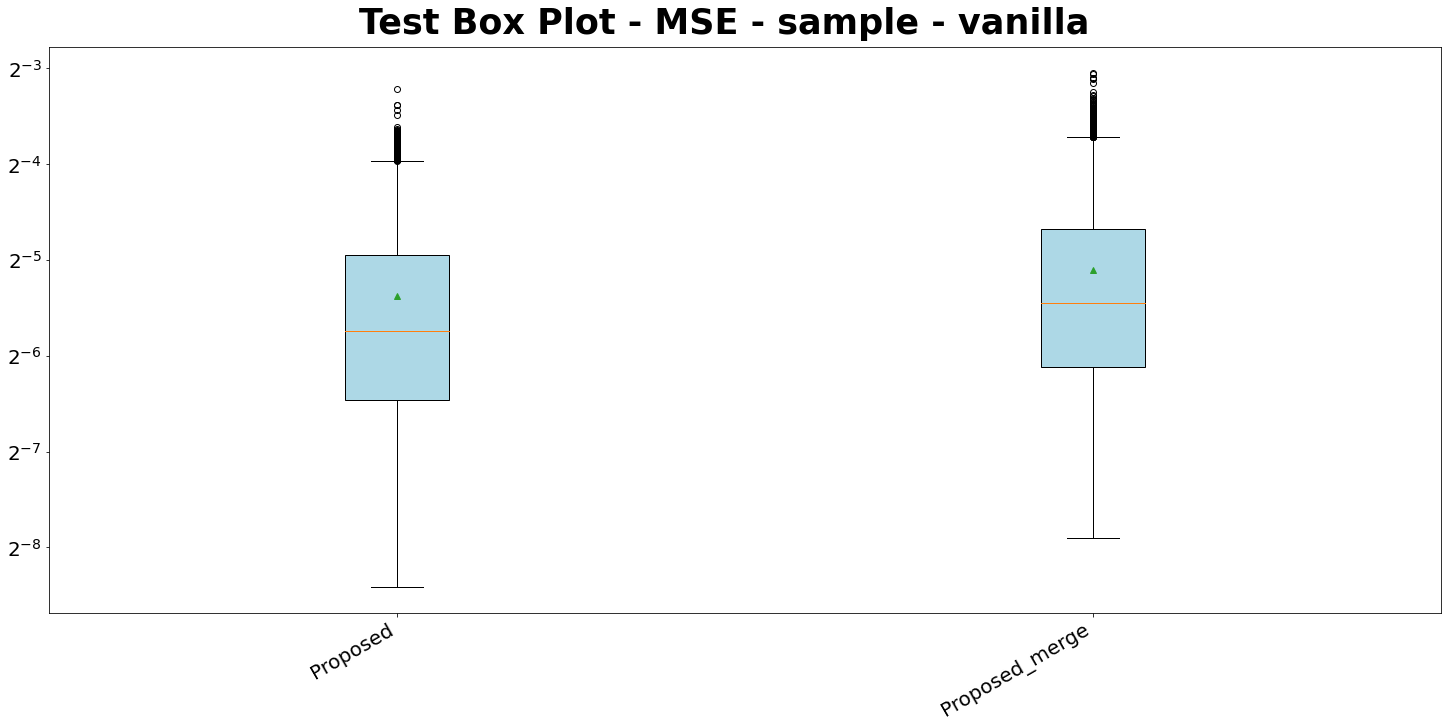

<Figure size 1440x720 with 0 Axes>

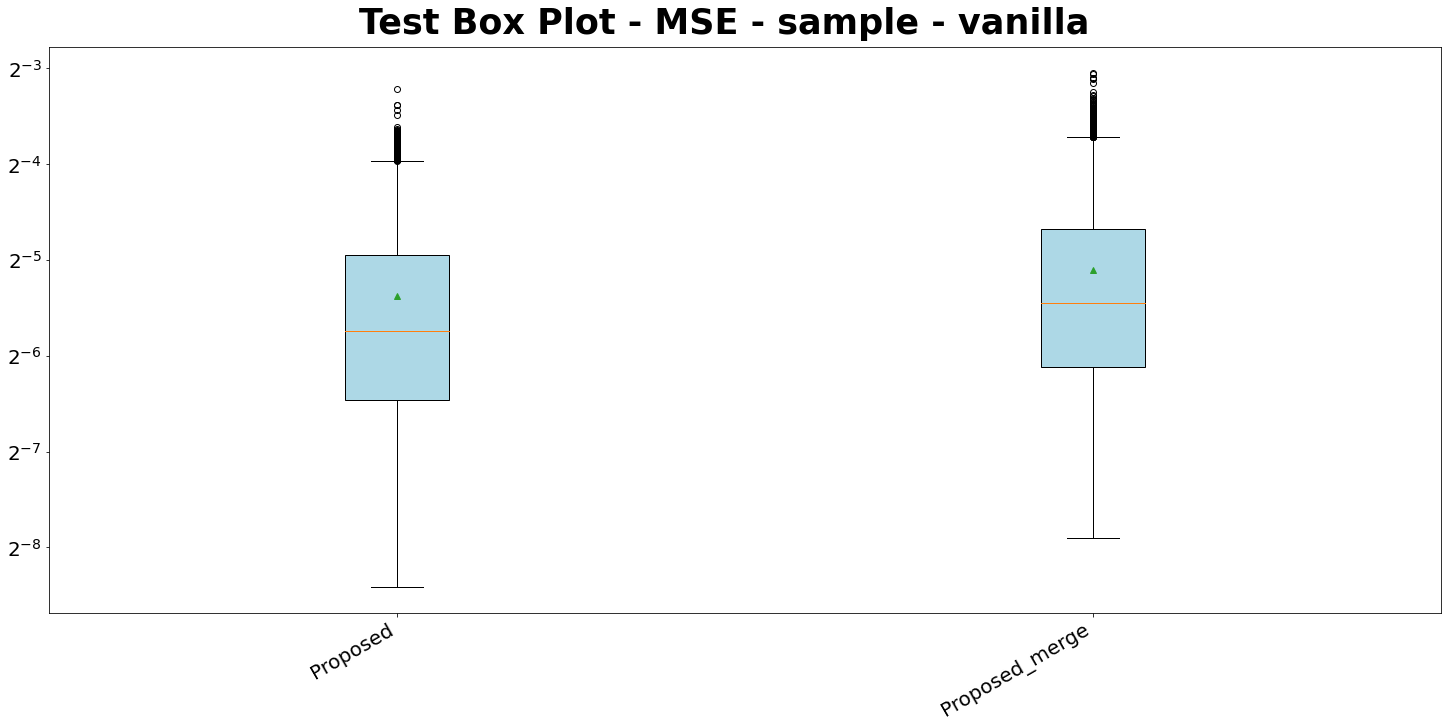

In [20]:
for item in ('mse', 'matched_mae', 'deviation', 'matched_mae(m)', 'average_depth'):
    for level in ('sample', 'segment'):
        RP.boxplot()